# Предсказание оттока клиентов оператора связи

## Описание проекта

Чтобы бороться с оттоком клиентов, оператор связи планирует предлагать промокоды и специальные условия тем, кто собирается отказаться от его услуг. Для этого оператору нужна модель, которая будет предсказывать, разорвёт ли абонент договор. 

### Описание услуг

Оператор предоставляет два основных типа услуг: 
- Стационарную телефонную связь. Телефон можно подключить к нескольким линиям одновременно.
- Интернет. Подключение может быть двух типов: через телефонную линию (`DSL`, от англ. digital subscriber line — «цифровая абонентская линия») или оптоволоконный кабель (`Fiber optic`).

Также доступны такие услуги:
- Интернет-безопасность: антивирус (`DeviceProtection`) и блокировка небезопасных сайтов (`OnlineSecurity`);
- Выделенная линия технической поддержки (`TechSupport`);
- Облачное хранилище файлов для резервного копирования данных (`OnlineBackup`);
- Стриминговое телевидение (`StreamingTV`) и каталог фильмов (`StreamingMovies`).

Клиенты могут платить за услуги каждый месяц или заключить договор на 1–2 года. Возможно оплатить счёт разными способами, а также получить электронный чек.

### Цель проекта

Разработать модель для прогноза оттока клиентов, которая будет предсказывать, разорвёт ли абонент договор, на основе персональных данных о клиенте, а также информации о тарифе и используемых услугах.

Требование к качеству модели: метрика ROC-AUC на тестовой выборке должна быть не меньше 0.85.

### Задачи проекта

- Провести исследовательский анализ и предобработку исходных данных.
- Подготовить данные для обучения моделей.
- Обучить как минимум две модели. Хотя бы для одной из них подобрать как минимум два гиперпараметра.
- Выбрать лучшую модель и проверить её качество на тестовой выборке.
- Дать рекомендации для бизнеса.

### Описание данных

Имеются собранные оператором персональные данные о некоторых клиентах, информацию об их тарифах и услугах.

Данные состоят из нескольких файлов, полученных из разных источников:

1. `contract_new.csv` — информация о договоре:
    - `customerID` — идентификатор абонента;
    - `BeginDate` — дата начала действия договора;
    - `EndDate` — дата окончания действия договора;
    - `Type` — тип оплаты: раз в год-два или ежемесячно;
    - `PaperlessBilling` — электронный расчётный лист;
    - `PaymentMethod` — тип платежа;
    - `MonthlyCharges` — расходы за месяц;
    - `TotalCharges` — общие расходы абонента.

2. `personal_new.csv` — персональные данные клиента:
    - `customerID` — идентификатор пользователя;
    - `gender` — пол;
    - `SeniorCitizen` — является ли абонент пенсионером;
    - `Partner` — есть ли у абонента супруг или супруга;
    - `Dependents` — есть ли у абонента дети.

3. `internet_new.csv` — информация об интернет-услугах:
    - `customerID` — идентификатор пользователя;
    - `InternetService` — тип подключения;
    - `OnlineSecurity` — блокировка опасных сайтов;
    - `OnlineBackup` — облачное хранилище файлов для резервного копирования данных;
    - `DeviceProtection` — антивирус;
    - `TechSupport` — выделенная линия технической поддержки;
    - `StreamingTV` — стриминговое телевидение;
    - `StreamingMovies` — каталог фильмов.

4. `phone_new.csv` — информация об услугах телефонии:
    - `customerID` — идентификатор пользователя;
    - `MultipleLines` — подключение телефона к нескольким линиям одновременно.

Во всех файлах столбец `customerID` содержит код клиента. Информация о договорах актуальна на 1 февраля 2020 года.

### План работы

1. Загрузка исходных данных и их первичный осмотр.

2. Предобработка и исследовательский анализ каждой таблицы:
    - Обработка пропусков и дубликатов, преобразование типов данных при необходимости. Проверка корректности и согласованности данных в таблицах.
    
3. Объединение таблиц по ключу — идентификатору абонента. 

4. Предобработка и исследовательский анализ объединённой таблицы:
    - Обработка пропусков и аномалий.
    
5. Генерация признаков: целевого признака и прогнозирующих признаков (предикторов), которые будут использоваться для обучения ML моделей.

6. Исследовательский анализ данных:
    - Анализ статистических характеристик и визуализация распределений признаков с разбивкой по значению целевого признака (оттока).
    - Анализ корреляций прогнозирующих признаков между собой и с целевым признаком.
    - Проверка сбалансированности данных по значениям целевого признака (оттока).
    - Составление предварительного портрета типичного ушедшего абонента.
   
7. Подготовка данных для обучения моделей:
    - Выделение прогнозирующих и целевого признаков в отдельные переменные.
    - Разделение данных на обучающую и тестовую выборки. 
    - Преобразование данных с учётом особенностей конкретных моделей.
    
8. Обучение нескольких ML моделей различных типов, подбор с помощью кросс-валидации на обучающей выборке оптимальных значений их гиперпараметров, которые обеспечат максимальное значение метрики ROC-AUC.

9. Выбор из обученных моделей лучшей модели и её анализ:
    - Проверка качества модели на тестовой выборке.
    - Проверка на адекватность (сравнение с дамми-моделью).
    - Анализ ошибок модели. Расчёт и анализ метрик качества классификации.
    - Оценка значимости признаков и их влияния на предсказания модели.
    
10. Отчёт о проделанной работе.

11. Выводы и рекомендации для бизнеса с учётом назначения модели.

### Установка и обновление библиотек

In [1]:
# обновляем версии библиотек и устанавливаем дополнительные библиотеки
%pip install matplotlib==3.7.5 seaborn==0.11.2 phik==0.12.4 shap==0.46.0 \
    scikit-learn==1.4.2 catboost==1.2.3 \
    optuna==4.1.0 optuna-integration[sklearn]==4.1.0 --quiet

Note: you may need to restart the kernel to use updated packages.


### Импорты

In [2]:
import os
import time
from datetime import timedelta
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colormaps
import seaborn as sns
import phik
import shap

from sklearn.model_selection import (
    train_test_split, 
    cross_val_score,
    GridSearchCV
)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    OneHotEncoder, 
    OrdinalEncoder, 
    StandardScaler
)
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score, 
    roc_auc_score,
    confusion_matrix,
    RocCurveDisplay,
    PrecisionRecallDisplay
)

# классы моделей
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from catboost import CatBoostClassifier

# Optuna
from optuna.integration import OptunaSearchCV
from optuna import distributions
import optuna.logging
from optuna.exceptions import ExperimentalWarning

### Настройки

In [3]:
# засекаем время начала выполнения кода проекта
start_time = time.time()

In [4]:
# дата выгрузки данных
CURRENT_DATE = pd.to_datetime('2020-02-01')

# фиксируем случайное состояние для воспроизводимости результатов
RANDOM_STATE = 50525

In [5]:
# отображать таблицы pandas полностью
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [6]:
# размер графика по умолчанию
plt.rcParams['figure.figsize'] = (12, 5)

In [7]:
# скрыть предупреждения
warnings.filterwarnings('ignore', category=RuntimeWarning)
warnings.filterwarnings('ignore', category=ExperimentalWarning)

In [8]:
# скрыть вывод optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# показать вывод optuna
# optuna.logging.set_verbosity(optuna.logging.INFO)

### Функции

In [9]:
def unique_values(data, columns=None, show_counts=False):
    """
    Для каждого из указанных столбцов таблицы выводит 
    отсортированный список уникальных значений в этом столбце.
    """
    # если не указаны столбцы, выбираем все
    if columns is None:
        columns = data.columns
    
    # если указан один столбец, преобразуем в список
    if isinstance(columns, str):
        columns = [columns]

    # выводим список уникальных значений в каждом из выбранных столбцов
    for col in columns:
        try:
            if show_counts:
                print(f'Уникальные значения в столбце \'{col}\' и их количество:')
                print_data = data[col].value_counts(sort=False, dropna=False).sort_index()
                if print_data.index.is_object():
                    print_data.index = print_data.index.map("'{}'".format, na_action='ignore')
                print(print_data.to_string())
            else:
                print(f'Уникальные значения в столбце \'{col}\':\n'
                      f'{data[col].sort_values().unique().tolist()}')
        except:
            print(f'Столбца {col} не существует.')
        print()

In [10]:
def stat_plots(data, column: str, target:str = None):
    """
    Строит графики, характеризующие признак:
    - гистограмму распределения и диаграмму размаха для количественных признаков,
    - столбчатую диаграмму и круговую диаграмму для категориальных признаков,
    с опциональной разбивкой по целевому признаку.
    """
    # если нет такого столбца
    if column not in data.columns:
        print(f"В таблице отсутствует столбец '{column}'")
        return None

    # если признак совпадает с целевым
    if target == column:
        target = None
    
    # если признак количественный
    if data[column].dtype in ['int64', 'float64']:
        # если признак дискретный
        if data[column].dtype == 'int64' and data[column].nunique() <= 30:
            discrete = True
            kde = False
        else:
            discrete = False
            kde = True
            
        # создаём область построения графиков
        nrows = 2 if target is not None else 1
        fig, axes = plt.subplots(
            nrows=nrows, 
            ncols=2, 
            figsize=(10, nrows*4), 
            constrained_layout=True, 
            squeeze=False
        )
        
        # строим гистограмму распределения
        sns.histplot(
            data=data, 
            x=column, 
            discrete=discrete, 
            kde=kde, 
            stat='count', 
            ax=axes[0, 0]
        )
        # добавляем линии: среднее и медиана
        axes[0, 0].axvline(
            x=data[column].mean(), 
            color='red', 
            label='Среднее'
        )
        axes[0, 0].axvline(
            x=data[column].median(), 
            color='red', 
            label='Медиана', 
            linestyle='--'
        )
        
        axes[0, 0].legend()
        axes[0, 0].set_xlabel('Значение признака ' + column)
        axes[0, 0].set_ylabel('Количество объектов')
        axes[0, 0].set_title('Гистограмма распределения признака ' + column)
        
        # строим диаграмму размаха
        sns.boxplot(
            data=data, 
            x=column, 
            orient='h',
            whis=3,
            ax=axes[0, 1]
        )
        axes[0, 1].set_yticklabels([])
        axes[0, 1].set_xlabel('Значение признака ' + column)
        axes[0, 1].set_title('Диаграмма размаха признака ' + column)
       
        # если задан целевой признак
        if target is not None:
            # строим гистограмму распределения
            sns.histplot(
                data=data, 
                x=column, 
                hue=target, 
                discrete=discrete, 
                kde=kde, 
                stat='probability', 
                common_norm=False, 
                ax=axes[1, 0]
            )
            axes[1, 0].set_xlabel('Значение признака ' + column)
            axes[1, 0].set_ylabel('Доля объектов')
            axes[1, 0].set_title('Гистограмма распределения (с разбивкой)')
            
            
            # добавляем линии: среднее и медиана
            colors = colormaps['tab10'].colors
            line_labels = []
            line_handles = []
            for u, color in zip(data[target].unique(), colors):
                vl1 = axes[1, 0].axvline(
                    x=data.loc[data[target] == u, column].mean(), 
                    color=color, 
                    linestyle='-',
                )
                line_labels.append('Среднее ({}: {})'.format(target, str(u)))
                line_handles.append(vl1)
                vl2 = axes[1, 0].axvline(
                    x=data.loc[data[target] == u, column].median(), 
                    color=color, 
                    linestyle='--',
                )
                line_labels.append('Медиана ({}: {})'.format(target, str(u)))
                line_handles.append(vl2)
            
            # добавляем легенду
            handles = axes[1, 0].get_legend().legend_handles
            labels = data[target].unique().tolist()
            axes[1, 0].legend(
                handles=handles+line_handles, 
                labels=labels+line_labels,
                title=target,
            )
            sns.move_legend(
                axes[1, 0], 'lower center',
                ncol=3,
                bbox_to_anchor=(0.5, 1.1)
            )
            
            # строим диаграмму размаха
            sns.boxplot(
                data=data, 
                x=column, 
                y=target,
                orient='h',
                whis=3,
                ax=axes[1, 1]
            )
            axes[1, 1].set_xlabel('Значение признака ' + column)
            axes[1, 1].set_ylabel('Значение признака ' + target)
            axes[1, 1].set_title('Диаграмма размаха (с разбивкой)')
        
        # если признак дискретный, то делаем метки на оси с шагом 1
        if discrete:
            x_min, x_max = data[column].agg(['min', 'max']).tolist()
            for ax in axes.flatten():
                ax.set_xticks(range(x_min, x_max+1))
                
    # если признак категориальный
    elif data[column].dtype in ['object', 'category']:
        # заполняем пропуски строковым значением 'NaN'
        # data = data.copy()
        # data = data.fillna('NaN')
        
        # данные для построения столбчатой диаграммы
        plot_data_ = (
            data
            .pivot_table(
                index=column,
                columns=target, 
                values=data.columns.drop([column, target], errors='ignore')[0], 
                aggfunc='count'
            )
        )
        # сортируем столбцы в сводной таблице
        plot_data_ = plot_data_.loc[:, plot_data_.columns.sort_values(ascending=False)]

        # если задан целевой признак и у него больше одного уникального значения
        if target is not None and data[target].nunique() > 1:
            uniq = data[target].unique()
        else:
            uniq = []
        # задаём размер область построения графиков
        nrows = 1 + (len(uniq) + 1) // 2    
        
        # если слишком длинные значения признака, то поворачиваем подписи
        # и увеличиваем высоту диаграммы
        if plot_data_.index.astype('str').str.len().max() > 20: 
            angle = 90
            figwidth = 14
            figheight = nrows*6
        else:
            angle = 0
            figwidth = 10
            figheight = nrows*4

        # создаём область построения графиков
        fig, axes = plt.subplots(
            nrows=nrows, 
            ncols=2, 
            figsize=(figwidth, figheight), 
            constrained_layout=True, 
            squeeze=False
        )
        
        # строим столбчатую диаграмму
        plot_data_.plot(
            kind='bar', 
            rot=angle, 
            stacked=True, 
            ax=axes[0, 0]
        )
        axes[0, 0].set_xlabel('Значение признака ' + column)
        axes[0, 0].set_ylabel('Количество объектов')
        axes[0, 0].set_title('Распределение по значениям признака ' + column)

        # добавляем аннотации и настраиваем легенду по разному, 
        # если указан целевой признак или если не указан
        if target is not None:
            # переводим количество в проценты
            percents = plot_data_.transform(lambda x: x / x.sum() * 100, axis=1)
            # добавляем метки со значениями и процентами на график
            for c, col in zip(axes[0, 0].containers, plot_data_.columns):
                vals = percents[col]
                labels = [
                    f'{v.get_height():.0f}\n({val:.1f}%)' if v.get_height() > 0 
                    else '' for v, val in zip(c, vals)
                ]
                axes[0, 0].bar_label(c, labels=labels, label_type='center')
        else:
            # добавляем метки со значениями на график
            for c in axes[0, 0].containers:
                labels = [
                    f'{v.get_height():.0f}' if v.get_height() > 0 
                    else '' for v in c
                ]
                axes[0, 0].bar_label(c, labels=labels, label_type='center')
            # удаляем легенду
            axes[0, 0].get_legend().remove()
            
        # данные для построения круговых диаграмм
        plot_data = [data[column].value_counts()]  
        # добавляем данные с разбивкой по значению целевого признака
        for u in uniq:
            p_d = (
                data
                .loc[data[target] == u, column]
                .value_counts()
            )
            order = plot_data[0].index.intersection(p_d.index)
            plot_data.append(p_d.loc[order])

        # названия круговых диаграмм
        titles = (
            [''] + 
            ['\nв подмножестве со значением признака\n' + target + ' = ' + str(u) for u in uniq]
        )
        for i, p_d in enumerate(plot_data):
            # индексы области построения
            r = (i + 1) // 2
            c = (i + 1) % 2
            # строим круговую диаграмму
            p_d.plot(
                kind='pie', 
                startangle=0, 
                autopct='%.1f%%', 
                pctdistance=0.8,
                ax=axes[r, c]
            )
            axes[r, c].set_ylabel('')
            axes[r, c].set_title('Доля значений признака ' + column + titles[i])
            
    else:
        print(f'Неподходящий тип данных в столбце {column}.')
        return

    # заголовок
    fig.suptitle('Признак: ' + column)
    
    return fig, axes

In [11]:
def corr_matrix(data, features=None, method='pearson', interval_cols=None):
    """
    Выводит матрицу корреляции количественных признаков features в данных data
    в виде тепловой карты.
    Дополнительный параметр:
    method - метод расчёта корреляции, по умолчанию 'pearson':
        'pearson' - корреляция Пирсона, 
        'spearman' - корреляция Спирмена,
        'kendall' - корреляция Кендалла,
        'phik' - корреляция фи.
    """
    if method == 'pearson':
        method_name = 'Пирсона'
    elif method == 'spearman':
        method_name = 'Спирмена'
    elif method == 'kendall':
        method_name = 'Кендалла'
    elif method == 'phik':
        method_name = '$\\phi_k$'
    else:
        print('Неправильно указан метод расчёта корреляций.')
        return None

    if features is None:
        features = data.columns
         
    # расчёт матрицы корреляции
    if method in [ 'pearson', 'spearman', 'kendall']:
        corr_data = data[features].corr(method=method)
        vmin = -1
        vmax = 1
        center = 0
        cmap='bwr'
    elif method == 'phik':
        corr_data = data[features].phik_matrix(interval_cols=interval_cols)
        vmin = 0
        vmax = 1
        center = 0.5
        cmap='Greens'
    
    # строим тепловую карту по матрице корреляции
    ax = sns.heatmap(corr_data, 
                     annot=True,
                     fmt='.2f',
                     square=True,
                     cmap=cmap, 
                     vmin=vmin,
                     vmax=vmax,
                     center=center,
    )
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(f'Коэффициенты корреляции {method_name}')

    return ax

In [12]:
def plot_confusion_matrix(y_true, y_pred, normalize=None):
    """
    Строит матрицу ошибок модели классификации.
    """
    cm = confusion_matrix(y_true, y_pred, normalize=normalize)
    fmt = 'd' if normalize is None else '.2%'

    plt.figure(figsize=(3, 3))
    ax = sns.heatmap(cm, annot=True, fmt=fmt, cmap='Blues_r', cbar=False)

    ax.set_xlabel('Предсказанное значение')
    ax.set_ylabel('Истинное значение')
    ax.set_title('Матрица ошибок модели')

    return ax

In [13]:
def plot_feature_importance(importance, feature_names):
    """
    Строит график важности признаков.
    """
    # формируем таблицу
    feature_df = (
        pd.DataFrame({'признак': feature_names, 'значение': importance})
        .sort_values(by='значение', key=lambda x: abs(x), ascending=False)
        .reset_index(drop=True)
    )
    # визуализируем данные в таблице
    ax = sns.barplot(data=feature_df, x='значение', y='признак')

    return ax

In [14]:
def encode_features(encoder, cat_columns, X_train, X_test):
    """
    Кодирует категориальные признаки в тренировочной и тестовой выборках.
    
    encoder - кодировщик,
    cat_columns - список категориальных признаков для кодирования.
    """
    # обучаем кодировщик и кодируем категориальные признаки в тренировочной выборке
    cat_features_train_encoded = encoder.fit_transform(X_train[cat_columns])
    
    # кодируем категориальные признаки в тестовой выборке
    cat_features_test_encoded = encoder.transform(X_test[cat_columns])
    
    # получаем от кодировщика список названий кодированных признаков 
    encoded_cat_columns = encoder.get_feature_names_out(cat_columns)
    
    # объединяем датафреймы с количественными и кодированными категориальными признаками
    X_train_encoded = pd.concat(
        [
            X_train[X_train.columns.drop(cat_columns)].reset_index(drop=True),
            pd.DataFrame(
                cat_features_train_encoded, 
                columns=encoded_cat_columns, 
                dtype='int'
            )
        ],
        axis=1
    )
    X_test_encoded = pd.concat(
        [
            X_test[X_train.columns.drop(cat_columns)].reset_index(drop=True),
            pd.DataFrame(
                cat_features_test_encoded, 
                columns=encoded_cat_columns, 
                dtype='int'
            )
        ],
        axis=1
    )
    return X_train_encoded, X_test_encoded

## Загрузка и первичный осмотр данных

Загрузка данных осуществляется из первого доступного источника: 
- расположения по умолчанию, указанного в описании проекта,
- заданного локального пути,
- расположения файлов на внешнем сервере.

In [15]:
# путь к файлам по умолчанию
path_default = '/datasets/'
# путь к файлам на локальном компьютере
path_local_rel = '~/datasets/'
path_local = os.path.expanduser(path_local_rel)
# путь к файлам на внешнем сервере
path_remote = 'https://<LINK_REMOVED>/datasets/'

# определение расположения файлов
if os.path.exists(path_default):
    path = path_default
    source = 'по умолчанию'
elif os.path.exists(path_local):
    path = path_local_rel
    source = 'локальный путь'
else:
    path = path_remote
    source = 'сетевой путь'
    
# загрузка данных из CSV файлов
try:
    data_contract = pd.read_csv(os.path.join(path, 'contract_new.csv'))
    data_personal = pd.read_csv(os.path.join(path, 'personal_new.csv'))
    data_internet = pd.read_csv(os.path.join(path, 'internet_new.csv'))
    data_phone = pd.read_csv(os.path.join(path, 'phone_new.csv'))
    print(f'Данные успешно загружены из источника: {source}: {path}')
except:
    print(f'Ошибка при загрузке данных из источника: {source}: {path}')

Данные успешно загружены из источника: локальный путь: ~/datasets/


### Первичный осмотр данных

Для удобства дальнейшей работы создадим список с названиями загруженных датасетов.

In [16]:
# список с названиями датасетов
df_list = [
    'data_contract', 
    'data_personal', 
    'data_internet', 
    'data_phone', 
]

Посмотрим на первые строки таблиц и общую информацию о них.

In [17]:
for df_name in df_list:
    # название таблицы
    print(f'{df_name}:')
    # первые 5 строк таблицы
    display(eval(df_name).head())
    print()

data_contract:


customerID   BeginDate EndDate            Type PaperlessBilling  \
0  7590-VHVEG  2020-01-01      No  Month-to-month              Yes   
1  5575-GNVDE  2017-04-01      No        One year               No   
2  3668-QPYBK  2019-10-01      No  Month-to-month              Yes   
3  7795-CFOCW  2016-05-01      No        One year               No   
4  9237-HQITU  2019-09-01      No  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges TotalCharges  
0           Electronic check           29.85        31.04  
1               Mailed check           56.95      2071.84  
2               Mailed check           53.85       226.17  
3  Bank transfer (automatic)           42.30       1960.6  
4           Electronic check           70.70        353.5


data_personal:


customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No


data_internet:


customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG             DSL             No          Yes               No   
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes          Yes               No   
3  7795-CFOCW             DSL            Yes           No              Yes   
4  9237-HQITU     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies  
0          No          No              No  
1          No          No              No  
2          No          No              No  
3         Yes          No              No  
4          No          No              No


data_phone:


customerID MultipleLines
0  5575-GNVDE            No
1  3668-QPYBK            No
2  9237-HQITU            No
3  9305-CDSKC           Yes
4  1452-KIOVK           Yes

In [18]:
for df_name in df_list:
    # название таблицы
    print(f'{df_name}:')
    # общая информация о таблице
    eval(df_name).info()
    print()

data_contract:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB

data_personal:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner      

### Выводы

- Данные содержатся в 4 таблицах (CSV файлах). 

- Объём данных относительно небольшой: в таблицах содержатся данные о примерно 7 тысяч абонентов. 

- Значения в таблицах соответствуют описанию данных.

- Явных пропусков в данных нет.

- Есть несоответствия типов данных в таблицах: 
    - Данные в столбце `TotalCharges` таблицы `data_contract` должны быть числовыми, а в столбцах `BeginDate` и `EndDate` — датами. Это может указывать на наличие неявных пропусков — значений-заполнителей (плейсхолдеров), или некорректных значений.
    - Значения признака `SeniorCitizen` в таблице `data_personal`, в отличие от остальных бинарных категориальных признаков, закодированы как `0` и `1`, а не как `No` и `Yes`.

## Исследовательский анализ и предобработка исходных данных

### Анализ уникальных значений

Рассмотрим уникальные значения категориальных признаков. Это поможет обнаружить ошибки, неявные дубликаты и пропуски в данных.

In [19]:
for df_name in df_list:
    # название таблицы
    print(f'{df_name}:')
    
    df = eval(df_name)
    cols = df.select_dtypes(exclude='float').columns.drop(['customerID', 'BeginDate', 'EndDate'], errors='ignore').tolist()
    unique_values(df, columns=cols, show_counts=False)
    print()

data_contract:
Уникальные значения в столбце 'Type':
['Month-to-month', 'One year', 'Two year']

Уникальные значения в столбце 'PaperlessBilling':
['No', 'Yes']

Уникальные значения в столбце 'PaymentMethod':
['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']

Уникальные значения в столбце 'TotalCharges':
[' ', '100.17', '100.19', '100.2', '100.24', '100.25', '100.4', '100.75', '100.88', '100.9', '100.94', '1000.0', '1000.12', '1000.43', '1001.0', '1001.1', '1001.81', '1002.05', '1002.13', '1002.46', '1003.15', '1003.93', '1004.08', '1005.2', '1005.3', '1006.0', '1006.95', '1007.1', '1007.5', '1008.37', '1008.45', '1008.48', '1008.58', '1008.6', '1008.8', '1009.65', '1009.8', '101.0', '101.2', '101.25', '101.75', '1010.1', '1010.65', '1011.66', '1012.35', '1012.5', '1013.27', '1013.5', '1014.75', '1015.07', '1015.2', '1016.6', '1017.45', '1017.9', '1018.37', '1018.77', '1018.8', '1019.4', '102.01', '102.25', '102.38', '102.41', '102.61', '102.6

В столбце `TotalCharges` таблицы `data_contract` обнаружено нечисловое значение — пробел, из-за чего данные в столбце имеют строковый тип. Вероятно, это значение является заполнителем пропусков.

В столбце `EndDate` таблицы `data_contract` наблюдается значение `No`, которое означает, что абонент не прекратил договор. Это значение является заполнителем пропусков и далее должно быть заменено на `NaN`. Посмотрим, нет ли в этом столбце других значений, которые не являются датами.

In [20]:
# считаем количество уникальных значений, не являющихся датой
data_contract['EndDate'][~data_contract['EndDate'].str.fullmatch('[0-9]{4}-[0-9]{2}-[0-9]{2}')].value_counts()

No    5942
Name: EndDate, dtype: int64

Других строковых значений, которые бы не позволяли преобразовать тип данных, не обнаружено.

### Преобразование типов данных

- Преобразуем тип данных в столбцах `BeginDate` и `EndDate` таблицы `data_contract` в тип даты-времени `datetime`. При этом настроим обработку ошибок таким образом, чтобы некорректные значения преобразовались в пропуски — `NaN`.

- Преобразуем тип данных в столбце `TotalCharges` таблицы `data_contract` в числовой. При этом настроим обработку ошибок таким образом, чтобы некорректные значения преобразовались в пропуски — `NaN`.

- Преобразуем значения в столбце `SeniorCitizen` таблицы `data_personal` в строковые для единообразия, заменив `0` на `No` и `1` на `Yes`.

In [21]:
# преобразуем тип данных в столбцах
for col in ['BeginDate', 'EndDate']:
    data_contract[col] = pd.to_datetime(data_contract[col], format='%Y-%m-%d', errors='coerce')

# преобразуем тип данных в столбце
data_contract['TotalCharges'] = pd.to_numeric(data_contract['TotalCharges'], errors='coerce')

# заменяем значения в столбце
data_personal['SeniorCitizen'] = data_personal['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

### Проверка дат

Посмотрим, за какой период времени у нас есть данные.

In [22]:
# находим минимальные и максимальные даты
data_contract[['BeginDate', 'EndDate']].agg(['min', 'max'])

BeginDate    EndDate
min 2013-10-01 2014-06-01
max 2020-02-01 2020-01-01

Данные собраны за период с 1 октября 2013 года до 1 февраля 2020 года.

Убедимся, что в датах нет ошибок: дата начала действия договора не может быть больше даты окончания.

In [23]:
# проверяем, что дата начала не позже даты окончания
(data_contract['BeginDate'] <= data_contract['EndDate'].fillna(CURRENT_DATE)).all()

True

Проверим, с какой дискретностью указаны даты начала и окончания действия договора. Для этого выведем уникальные значения числа (номера дня) в столбцах `BeginDate` и `EndDate`.

In [24]:
# список уникальных значений номера дня
for col in ['BeginDate', 'EndDate']:
    print(f"{col}: {data_contract[col].dt.day.unique().tolist()}")

BeginDate: [1]
EndDate: [nan, 1.0]


Во всех датах номер дня — 1. Получается, что даты указаны с точностью до месяца.

### Проверка на дубликаты

Проверим, не содержатся ли в таблицах дубликаты записей для одного и того же абонента.

In [25]:
print('Количество дубликатов:')
for df_name in df_list:
    print(f"{df_name}: {eval(df_name).duplicated(subset=['customerID']).sum()}")

Количество дубликатов:
data_contract: 0
data_personal: 0
data_internet: 0
data_phone: 0


Дубликаты отсутствуют.

### Задание индекса

Установим значения первичного ключа `customerID` в качестве индекса во всех таблицах. Это позволит далее объединить таблицы по этому ключу с помощью метода `join`.

In [26]:
for df_name in df_list:
    df = eval(df_name)
    # устанавливаем индекс 
    df.set_index('customerID', inplace=True)

Посмотрим на результаты преобразований.

In [27]:
for df_name in df_list:
    # название таблицы
    print(f'{df_name}:')
    # общая информация о таблице
    eval(df_name).info()
    print()

data_contract:
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7043 non-null   datetime64[ns]
 1   EndDate           1101 non-null   datetime64[ns]
 2   Type              7043 non-null   object        
 3   PaperlessBilling  7043 non-null   object        
 4   PaymentMethod     7043 non-null   object        
 5   MonthlyCharges    7043 non-null   float64       
 6   TotalCharges      7032 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(3)
memory usage: 440.2+ KB

data_personal:
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7043 non-null   object
 1   SeniorCitizen  7043 non-null   object
 2   P

### Выводы

Выполнен исследовательский анализ и проведена предобработка исходных табличных данных.

1. Проведён анализ уникальных значений категориальных признаков в данных:
    - В столбце `TotalCharges` таблицы `data_contract` обнаружено нечисловое значение — пробел, из-за чего данные в столбце имеют строковый тип. Вероятно, это значение является заполнителем пропусков.
    - В столбце `EndDate` таблицы `data_contract` наблюдается значение `No`, которое означает, что абонент не прекратил договор. Это значение является заполнителем пропусков.

2. Выполнено преобразование типов данных:
    - Данные в столбцах `BeginDate` и `EndDate` таблицы `data_contract` приведены к типу даты-времени. При этом некорректные значения (`No` в столбце `EndDate`) преобразованы в пропуски — `NaN`.
    - Данных в столбце `TotalCharges` таблицы `data_contract` приведены в числовому типу. При этом некорректные значения (пробелы) преобразованы в пропуски — `NaN`.
    - В столбце `SeniorCitizen` таблицы `data_personal` числовые значения `0` и `1` заменены на строковые `No` и `Yes` для единообразия с остальными категориальными признаками. 

3. Выполнена проверка на дубликаты записей для одного и того же абонента. Дубликаты не обнаружены.

3. Значения первичного ключа `customerID` установлены в качестве индекса во всех таблицах, что позволит объединить таблицы по индексу с помощью метода `join`.

## Объединение данных

Объединим все 4 таблицы в одну таким образом, чтобы в неё попали данные обо всех абонентах, которые фигурируют в таблице `data_contract`, т.е. для которых есть информация о договоре. Это соответствует типу соединения таблиц LEFT JOIN, который используется в методе `DataFrame.join()` по умолчанию.

In [28]:
# объединяем таблицы
data = data_contract.join([data_personal, data_internet, data_phone])

Посмотрим на результат объединения таблиц.

In [29]:
# первые 5 строк таблицы
data.head()

BeginDate EndDate            Type PaperlessBilling  \
customerID                                                       
7590-VHVEG 2020-01-01     NaT  Month-to-month              Yes   
5575-GNVDE 2017-04-01     NaT        One year               No   
3668-QPYBK 2019-10-01     NaT  Month-to-month              Yes   
7795-CFOCW 2016-05-01     NaT        One year               No   
9237-HQITU 2019-09-01     NaT  Month-to-month              Yes   

                        PaymentMethod  MonthlyCharges  TotalCharges  gender  \
customerID                                                                    
7590-VHVEG           Electronic check           29.85         31.04  Female   
5575-GNVDE               Mailed check           56.95       2071.84    Male   
3668-QPYBK               Mailed check           53.85        226.17    Male   
7795-CFOCW  Bank transfer (automatic)           42.30       1960.60    Male   
9237-HQITU           Electronic check           70.70        353.50  Female   

           SeniorCitizen Partner Dependents InternetService OnlineSecurity  \
customerID                                                                   
7590-VHVEG            No     Yes         No             DSL             No   
5575-GNVDE            No      No         No             DSL            Yes   
3668-QPYBK            No      No         No             DSL            Yes   
7795-CFOCW            No      No         No             DSL            Yes   
9237-HQITU            No      No         No     Fiber optic             No   

           OnlineBackup DeviceProtection TechSupport StreamingTV  \
customerID                                                         
7590-VHVEG          Yes               No          No          No   
5575-GNVDE           No              Yes          No          No   
3668-QPYBK          Yes               No          No          No   
7795-CFOCW           No              Yes         Yes          No   
9237-HQITU           No               No          No          No   

           StreamingMovies MultipleLines  
customerID                                
7590-VHVEG              No           NaN  
5575-GNVDE              No            No  
3668-QPYBK              No            No  
7795-CFOCW              No           NaN  
9237-HQITU              No            No

In [30]:
# общая информация о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7043 non-null   datetime64[ns]
 1   EndDate           1101 non-null   datetime64[ns]
 2   Type              7043 non-null   object        
 3   PaperlessBilling  7043 non-null   object        
 4   PaymentMethod     7043 non-null   object        
 5   MonthlyCharges    7043 non-null   float64       
 6   TotalCharges      7032 non-null   float64       
 7   gender            7043 non-null   object        
 8   SeniorCitizen     7043 non-null   object        
 9   Partner           7043 non-null   object        
 10  Dependents        7043 non-null   object        
 11  InternetService   5517 non-null   object        
 12  OnlineSecurity    5517 non-null   object        
 13  OnlineBackup      5517 non-null   object        
 14  DeviceProtecti

### Выводы

1. Исходные таблицы объединены в одну по ключу — идентификатору абонента `customerID`, который был установлен в качестве индекса в каждой таблице.

2. В объединенной таблице появились пропущенные значения в столбцах, взятых из таблиц `data_internet` (информация об интернет-услугах) и `data_phone` (информация об услугах телефонии). Пропущенное значение признака означает, что клиент соответствующими услугами не пользуется.

## Предобработка и исследовательский анализ объединённого датафрейма

### Обработка пропусков

После преобразования типов и объединения данных, в объединённой таблице имеются пропуски, которые необходимо обработать.

In [31]:
# количество пропущенных значений
data.isna().sum()

BeginDate              0
EndDate             5942
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges          11
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
dtype: int64

Пропущенные значения есть в столбцах `EndDate`, `TotalCharges`, а также в столбцах, взятых из таблиц `data_internet` (информация об интернет-услугах) и `data_phone` (информация об услугах телефонии).

Пропуски в столбце `EndDate` указывают на то, что клиенты не прекратили пользоваться услугами оператора. Они будут использованы при создании целевого признака, поэтому заполнять их не нужно.

#### Общие расходы

Для начала посмотрим на записи об абонентах, у которых пропущено значение в столбце `TotalCharges`. Таких записей всего 11.

In [32]:
# записи с пропусками в столбце 'TotalCharges'
data.query("TotalCharges.isna()")

BeginDate EndDate      Type PaperlessBilling  \
customerID                                                 
4472-LVYGI 2020-02-01     NaT  Two year              Yes   
3115-CZMZD 2020-02-01     NaT  Two year               No   
5709-LVOEQ 2020-02-01     NaT  Two year               No   
4367-NUYAO 2020-02-01     NaT  Two year               No   
1371-DWPAZ 2020-02-01     NaT  Two year               No   
7644-OMVMY 2020-02-01     NaT  Two year               No   
3213-VVOLG 2020-02-01     NaT  Two year               No   
2520-SGTTA 2020-02-01     NaT  Two year               No   
2923-ARZLG 2020-02-01     NaT  One year              Yes   
4075-WKNIU 2020-02-01     NaT  Two year               No   
2775-SEFEE 2020-02-01     NaT  Two year              Yes   

                        PaymentMethod  MonthlyCharges  TotalCharges  gender  \
customerID                                                                    
4472-LVYGI  Bank transfer (automatic)           52.55           NaN  Female   
3115-CZMZD               Mailed check           20.25           NaN    Male   
5709-LVOEQ               Mailed check           80.85           NaN  Female   
4367-NUYAO               Mailed check           25.75           NaN    Male   
1371-DWPAZ    Credit card (automatic)           56.05           NaN  Female   
7644-OMVMY               Mailed check           19.85           NaN    Male   
3213-VVOLG               Mailed check           25.35           NaN    Male   
2520-SGTTA               Mailed check           20.00           NaN  Female   
2923-ARZLG               Mailed check           19.70           NaN    Male   
4075-WKNIU               Mailed check           73.35           NaN  Female   
2775-SEFEE  Bank transfer (automatic)           61.90           NaN    Male   

           SeniorCitizen Partner Dependents InternetService OnlineSecurity  \
customerID                                                                   
4472-LVYGI            No     Yes        Yes             DSL            Yes   
3115-CZMZD            No      No        Yes             NaN            NaN   
5709-LVOEQ            No     Yes        Yes             DSL            Yes   
4367-NUYAO            No     Yes        Yes             NaN            NaN   
1371-DWPAZ            No     Yes        Yes             DSL            Yes   
7644-OMVMY            No     Yes        Yes             NaN            NaN   
3213-VVOLG            No     Yes        Yes             NaN            NaN   
2520-SGTTA            No     Yes        Yes             NaN            NaN   
2923-ARZLG            No     Yes        Yes             NaN            NaN   
4075-WKNIU            No     Yes        Yes             DSL             No   
2775-SEFEE            No      No        Yes             DSL            Yes   

           OnlineBackup DeviceProtection TechSupport StreamingTV  \
customerID                                                         
4472-LVYGI           No              Yes         Yes         Yes   
3115-CZMZD          NaN              NaN         NaN         NaN   
5709-LVOEQ          Yes              Yes          No         Yes   
4367-NUYAO          NaN              NaN         NaN         NaN   
1371-DWPAZ          Yes              Yes         Yes         Yes   
7644-OMVMY          NaN              NaN         NaN         NaN   
3213-VVOLG          NaN              NaN         NaN         NaN   
2520-SGTTA          NaN              NaN         NaN         NaN   
2923-ARZLG          NaN              NaN         NaN         NaN   
4075-WKNIU          Yes              Yes         Yes         Yes   
2775-SEFEE          Yes               No         Yes          No   

           StreamingMovies MultipleLines  
customerID                                
4472-LVYGI              No           NaN  
3115-CZMZD             NaN            No  
5709-LVOEQ             Yes            No  
4367-NUYAO             NaN           Yes  
1371-DWPAZ              No           NaN  
76

У всех таких абонентов месяц начала действия договора — февраль 2020 года, что совпадает с датой выгрузки данных 2020-02-01. Также все они заключили договор сразу на 2 года.

Проверим, что пропуски есть только у тех абонентов, кто заключил договор 2020-02-01.

In [33]:
# проверяем равенство индексов
(data.query("BeginDate >= '2020-02-01'").index == data.query("TotalCharges.isna()").index).all()

True

Действительно, пропуски в `TotalCharges` у тех абонентов, кто заключил договор в дату выгрузки данных.

Теперь посмотрим, как рассчитывается значение `TotalCharges` (общие расходы абонента). Для этого посмотрим на абонентов, заключивших договор за предыдущие 2 месяца — начиная с декабря 2019 года, и у которых тип оплаты не ежемесячный.

In [34]:
# записи, соответствующие условиям
data.query(
    "'2019-12-01' <= BeginDate < '2020-02-01' and Type != 'Month-to-month'"
).sort_values(by='BeginDate', ascending=False)

BeginDate EndDate      Type PaperlessBilling  \
customerID                                                 
6469-MRVET 2020-01-01     NaT  One year              Yes   
5562-BETPV 2020-01-01     NaT  One year               No   
8985-OOPOS 2020-01-01     NaT  One year               No   
2967-MXRAV 2020-01-01     NaT  One year               No   
8559-WNQZS 2020-01-01     NaT  Two year               No   
2239-CFOUJ 2020-01-01     NaT  One year               No   
1064-FBXNK 2020-01-01     NaT  One year               No   
1099-GODLO 2020-01-01     NaT  Two year               No   
3069-SSVSN 2020-01-01     NaT  One year               No   
5173-ZXXXL 2019-12-01     NaT  One year               No   
4697-LUPSU 2019-12-01     NaT  One year               No   
4854-SSLTN 2019-12-01     NaT  Two year               No   
8610-ZIKJJ 2019-12-01     NaT  One year               No   
6870-ECSHE 2019-12-01     NaT  One year               No   
5857-XRECV 2019-12-01     NaT  One year               No   

                        PaymentMethod  MonthlyCharges  TotalCharges  gender  \
customerID                                                                    
6469-MRVET           Electronic check           20.20         20.20    Male   
5562-BETPV               Mailed check           19.65         19.65    Male   
8985-OOPOS    Credit card (automatic)           74.10         74.84  Female   
2967-MXRAV               Mailed check           18.80         19.74    Male   
8559-WNQZS               Mailed check           20.45         20.45    Male   
2239-CFOUJ               Mailed check           20.40         21.62    Male   
1064-FBXNK    Credit card (automatic)           19.85         21.44    Male   
1099-GODLO               Mailed check           20.35         20.76  Female   
3069-SSVSN               Mailed check           25.85         26.37  Female   
5173-ZXXXL               Mailed check           19.95         39.90    Male   
4697-LUPSU               Mailed check           20.20         42.82    Male   
4854-SSLTN               Mailed check           59.50        121.38    Male   
8610-ZIKJJ               Mailed check           20.30         43.85  Female   
6870-ECSHE               Mailed check           20.45         40.90  Female   
5857-XRECV  Bank transfer (automatic)           20.50         41.00  Female   

           SeniorCitizen Partner Dependents InternetService OnlineSecurity  \
customerID                                                                   
6469-MRVET            No     Yes        Yes             NaN            NaN   
5562-BETPV            No     Yes        Yes             NaN            NaN   
8985-OOPOS            No      No         No             DSL             No   
2967-MXRAV            No     Yes        Yes             NaN            NaN   
8559-WNQZS            No      No         No             NaN            NaN   
2239-CFOUJ            No     Yes        Yes             NaN            NaN   
1064-FBXNK            No     Yes        Yes             NaN            NaN   
1099-GODLO            No     Yes        Yes             NaN            NaN   
3069-SSVSN            No      No         No             DSL             No   
5173-ZXXXL            No      No         No             NaN            NaN   
4697-LUPSU            No     Yes        Yes             NaN            NaN   
4854-SSLTN            No     Yes        Yes             DSL            Yes   
8610-ZIKJJ            No     Yes        Yes             NaN            NaN   
6870-ECSHE            No      No         No             NaN            NaN   
5857-XRECV            No      No        Yes             NaN            NaN   

           OnlineBackup DeviceProtection TechSupport StreamingTV  \
customerID                                                         
6469-MRVET          NaN              NaN         NaN         NaN   
5562-BETPV          NaN              NaN         NaN         NaN   
8985-OOPOS           No              Yes        

Видно, что у тех, кто заключил договор в январе и на момент выгрузки данных имел абонентский стаж 1 месяц, значение `TotalCharges` (общие расходы) приблизительно совпадает со значением `MonthlyCharges` (расходы за месяц). У тех же, кто заключил договор в декабре и на момент выгрузки данных имел абонентский стаж 2 месяца, значение `TotalCharges` (общие расходы) близко к удвоенному значению `MonthlyCharges` (расходы за месяц).

Таким образом, понятно, что полные расходы считаются за прошедший период, поэтому у новых абонентов, которые только что заключили договор, общие расходы должны быть равны 0. Значит, пропуски в столбце `TotalCharges` можно заполнить нулями.

In [35]:
# заполняем пропущенные значения
data['TotalCharges'] = data['TotalCharges'].fillna(0)

#### Информация об интернет-услугах

Убедимся, что пропущенные значения во всех соответствующих столбцах присутствуют в одних и тех же строках. Так должно быть, потому что пропуски появились в результате объединения таблиц.

In [36]:
# проверяем, что пропуски в одних и тех же строках
data[[
    'InternetService',
    'OnlineSecurity', 
    'OnlineBackup', 
    'DeviceProtection', 
    'TechSupport', 
    'StreamingTV', 
    'StreamingMovies']].isna().T.duplicated(keep=False).all()

True

Проверим на всякий случай, что в данных нет абонентов, которые не пользуются ни интернетом, ни телефоном.

In [37]:
# проверяем, что количество строк с пропусками в обоих признаках равно 0
data.query("InternetService.isna() and MultipleLines.isna()").shape[0] == 0

True

Пропущенные значения в категориальных признаках следует заполнить плейсхолдером. При кодировании признаков `OneHotEncoder`, чтобы избежать дамми-ловушки, удаляет первое значение признака, сортируя их в лексикографическом порядке.

Чтобы получить более информативные значения признаков (это важно для удобства анализа их значимости), будет лучше, если первым в списке будет значение-заполнитель. Поэтому плейсхолдер должен быть таким, чтобы при лексикографическом сравнении он был первым. Этому условию удовлетворяет значение, начинающееся с неалфавитного символа, например, `=N/A=` (N/A — not applicable).

In [38]:
# проверяем порядок сортировки
sorted(['A', 'a', 'Z', '=N/A='])

['=N/A=', 'A', 'Z', 'a']

In [39]:
# список столбцов, в которых есть пропущенные значения
columns_with_na = [
    'InternetService',
    'OnlineSecurity', 
    'OnlineBackup', 
    'DeviceProtection', 
    'TechSupport', 
    'StreamingTV', 
    'StreamingMovies',
    'MultipleLines'
 ]
# заполняем пропущенные значения
data[columns_with_na] = data[columns_with_na].fillna('=N/A=')

Проверим результат заполнения пропусков. Они должны остаться только в столбце `EndDate`.

In [40]:
# общая информация о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7043 non-null   datetime64[ns]
 1   EndDate           1101 non-null   datetime64[ns]
 2   Type              7043 non-null   object        
 3   PaperlessBilling  7043 non-null   object        
 4   PaymentMethod     7043 non-null   object        
 5   MonthlyCharges    7043 non-null   float64       
 6   TotalCharges      7043 non-null   float64       
 7   gender            7043 non-null   object        
 8   SeniorCitizen     7043 non-null   object        
 9   Partner           7043 non-null   object        
 10  Dependents        7043 non-null   object        
 11  InternetService   7043 non-null   object        
 12  OnlineSecurity    7043 non-null   object        
 13  OnlineBackup      7043 non-null   object        
 14  DeviceProtecti

### Генерация признаков

#### Целевой признак — отток

Целевой признак в данном проекте — это факт того, что абонент расторг договор с оператором. Обозначим его `Churn` ("отток") Его мы будем предсказывать с помощью ML модели на основе имеющейся информации о клиенте.

Значение целевого признака ­— бинарное, `0` — абонент остаётся, `1` — абонент расторг договор. 

Для создания признака используем информацию в столбце `EndDate`: если дата окончания договора есть, то абонент расторг договор, а если вместо неё пропуск — остаётся.

Тип данных для признака `Churn` установим `category` ("категория"), чтобы в дальнейшем удобно было строить графики распределения значений признака.

In [41]:
# создаём целевой признак
data['Churn'] = (
    data['EndDate'].apply(lambda x: 0 if pd.isna(x) else 1)
    .astype('category')
)

# выводим 10 случайных строк для проверки результата
data[['EndDate', 'Churn']].sample(
    n=10, random_state=12
)

EndDate Churn
customerID                 
5180-UCIIQ        NaT     0
8868-WOZGU 2019-11-01     1
5012-YSPJJ        NaT     0
7225-CBZPL        NaT     0
0334-ZFJSR 2018-11-01     1
2585-KTFRE        NaT     0
8148-NLEGT 2019-09-01     1
4795-UXVCJ        NaT     0
3429-IFLEM 2015-06-01     1
2720-WGKHP        NaT     0

In [42]:
# проверяет количество ушедших клиентов
data['Churn'].value_counts()

0    5942
1    1101
Name: Churn, dtype: int64

Количество единиц соответствует количеству пропущенных значений в столбце `EndDate`, значит всё в порядке.

#### Длительность подписки

Введём новый признак — `SubscriptionLength` (длительность подписки в днях) как разницу между датами начала и окончания действия абонентского договора. Для тех абонентов, кто не прекратил пользоваться услугами оператора, вместо даты окончания действия договора укажем текущую дату (дату выгрузки данных).

In [43]:
# добавляем столбец с длительностью подписки
data['SubscriptionLength'] = (
    data['EndDate'].fillna(CURRENT_DATE) - data['BeginDate']
).dt.days

# выводим 10 случайных строк для проверки результата
data[['BeginDate', 'EndDate', 'SubscriptionLength']].sample(
    n=10, random_state=12
)

BeginDate    EndDate  SubscriptionLength
customerID                                          
5180-UCIIQ 2018-03-01        NaT                 702
8868-WOZGU 2017-08-01 2019-11-01                 822
5012-YSPJJ 2017-07-01        NaT                 945
7225-CBZPL 2018-09-01        NaT                 518
0334-ZFJSR 2015-07-01 2018-11-01                1219
2585-KTFRE 2020-01-01        NaT                  31
8148-NLEGT 2016-08-01 2019-09-01                1126
4795-UXVCJ 2017-12-01        NaT                 792
3429-IFLEM 2014-03-01 2015-06-01                 457
2720-WGKHP 2019-08-01        NaT                 184

Как можно убедиться, подсчитав разницу между датами в днях, результат корректный.

#### Месяц начала действия договора

Добавим новый признак `BeginMonth` (месяц начала действия договора). Это позволит нам учесть сезонность. Возможно, есть разница в поведении клиентов, подключившихся в разные месяцы. Например, может быть связь с началом учебного года.

In [44]:
# добавляем столбец с месяцем действия договора
data['BeginMonth'] = data['BeginDate'].dt.month

# выводим 10 случайных строк для проверки результата
data[['BeginDate', 'BeginMonth']].sample(
    n=10, random_state=12
)

BeginDate  BeginMonth
customerID                       
5180-UCIIQ 2018-03-01           3
8868-WOZGU 2017-08-01           8
5012-YSPJJ 2017-07-01           7
7225-CBZPL 2018-09-01           9
0334-ZFJSR 2015-07-01           7
2585-KTFRE 2020-01-01           1
8148-NLEGT 2016-08-01           8
4795-UXVCJ 2017-12-01          12
3429-IFLEM 2014-03-01           3
2720-WGKHP 2019-08-01           8

#### Количество подключённых дополнительных интернет-услуг

Возможно, для предсказания оттока будет полезен признак `AddServicesNum` — количество подключённых дополнительных интернет-услуг, чем факт пользования каждой из них в отдельности.

In [45]:
# список дополнительных интернет-услуг
add_services_list = [
    'OnlineSecurity', 
    'OnlineBackup', 
    'DeviceProtection', 
    'TechSupport', 
    'StreamingTV', 
    'StreamingMovies',
 ]

# добавляем столбец с количеством дополнительных интернет-услуг
data['AddServicesNum'] = (
    data[add_services_list].apply(lambda x: x.eq('Yes').sum(), axis=1)
)

# выводим 10 случайных строк для проверки результата
data[add_services_list + ['AddServicesNum']].sample(
    n=10, random_state=12
)

OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
customerID                                                            
5180-UCIIQ            Yes           No               No          No   
8868-WOZGU             No          Yes              Yes          No   
5012-YSPJJ             No           No              Yes         Yes   
7225-CBZPL             No           No               No          No   
0334-ZFJSR            Yes          Yes               No         Yes   
2585-KTFRE            Yes          Yes               No         Yes   
8148-NLEGT          =N/A=        =N/A=            =N/A=       =N/A=   
4795-UXVCJ          =N/A=        =N/A=            =N/A=       =N/A=   
3429-IFLEM            Yes          Yes              Yes         Yes   
2720-WGKHP             No           No               No          No   

           StreamingTV StreamingMovies  AddServicesNum  
customerID                                              
5180-UCIIQ          No             Yes               2  
8868-WOZGU         Yes             Yes               4  
5012-YSPJJ          No              No               2  
7225-CBZPL         Yes             Yes               2  
0334-ZFJSR          No              No               3  
2585-KTFRE          No             Yes               4  
8148-NLEGT       =N/A=           =N/A=               0  
4795-UXVCJ       =N/A=           =N/A=               0  
3429-IFLEM         Yes              No               5  
2720-WGKHP         Yes             Yes               2

#### Факт смены тарифа

Добавим ещё признак `TariffChanged` — факт смены тарифа абонентом, который тоже может быть полезным для прогнозирования оттока.

Для определения того, что абонент менял тариф, надо проверить равенство общих расходов абонента произведению ежемесячных расходов на длительность подписки в месяцах. Если эти величины не совпадают, значит абонент тариф менял.

In [46]:
# даты начала и окончания подписки
begin_dates = data['BeginDate']
end_dates = data['EndDate'].fillna(CURRENT_DATE)

# вычисляем длительность подписки в месяцах
data['SubscriptionMonths'] = (
    (end_dates.dt.year - begin_dates.dt.year) * 12 + 
    (end_dates.dt.month - begin_dates.dt.month)
)
del begin_dates, end_dates

# добавляем новый признак - факт смены тарифа
data['TariffChanged'] = (
    data['TotalCharges'] != data['MonthlyCharges'] * data['SubscriptionMonths']
).map({False: 'No', True: 'Yes'})

# выводим 10 случайных строк для проверки результата
data[['TotalCharges', 'MonthlyCharges', 'SubscriptionMonths', 'TariffChanged']].sample(
    n=10, random_state=12
)

TotalCharges  MonthlyCharges  SubscriptionMonths TariffChanged
customerID                                                                
5180-UCIIQ       1013.27           40.05                  23           Yes
8868-WOZGU       2853.90          105.70                  27            No
5012-YSPJJ       1718.55           54.35                  31           Yes
7225-CBZPL       1627.72           94.80                  17           Yes
0334-ZFJSR       2721.26           66.05                  40           Yes
2585-KTFRE         70.45           70.45                   1            No
8148-NLEGT        849.15           22.95                  37            No
4795-UXVCJ        555.98           19.80                  26           Yes
3429-IFLEM       1160.25           77.35                  15            No
2720-WGKHP        564.00           94.00                   6            No

#### Итоги

В данные добавлены целевой признак `Churn` (отток, т.е. прекратил ли абонент действие договора) и 4 прогнозирующих признака: `SubscriptionLength` (длительность подписки в днях), `BeginMonth` (месяц начала действия договора), `AddServicesNum` (количество подключённых дополнительных интернет-услуг), `TariffChanged` (факт смены тарифа).

После добавления новых признаков столбцы с датами `BeginDate` и `EndDate`, а также избыточный признак `SubscriptionMonths` можно удалить.

In [47]:
# удаляем ненужные столбцы
data = data.drop(columns=['BeginDate', 'EndDate', 'SubscriptionMonths'], errors='ignore')

# общая информация о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Type                7043 non-null   object  
 1   PaperlessBilling    7043 non-null   object  
 2   PaymentMethod       7043 non-null   object  
 3   MonthlyCharges      7043 non-null   float64 
 4   TotalCharges        7043 non-null   float64 
 5   gender              7043 non-null   object  
 6   SeniorCitizen       7043 non-null   object  
 7   Partner             7043 non-null   object  
 8   Dependents          7043 non-null   object  
 9   InternetService     7043 non-null   object  
 10  OnlineSecurity      7043 non-null   object  
 11  OnlineBackup        7043 non-null   object  
 12  DeviceProtection    7043 non-null   object  
 13  TechSupport         7043 non-null   object  
 14  StreamingTV         7043 non-null   object  
 15  StreamingMovies     7043 non

### Анализ распределений

Для проверки данных на аномалии исследуем **статистические характеристики количественных признаков** с помощью метода `describe()`.

Кроме того, построим графики, характеризующие признаки в данных:
- **Гистограмму распределения и диаграмму размаха для количественных признаков**. На гистограммах для количественных признаков с разбивкой по значению целевого признака `Churn` покажем доли от общего количества абонентов с соответствующим значением целевого признака. Диаграммы размаха тоже построим с разбивкой. 
- **Столбчатую диаграмму и круговую диаграмму для категориальных признаков**. На столбчатых диаграммах для категориальных признаков покажем разбивку по значению целевого признака. Круговые диаграммы построим для всех данных и отдельно для каждого значения целевого признака. 

Это позволит увидеть различия в распределении значений признаков в зависимости от значения целевого признака.

Для построения графиков используем функцию `stat_plots()`.

In [48]:
# статистические характеристики числовых признаков
data.describe().T.astype({'count': 'int'})

count         mean          std    min     25%      50%  \
MonthlyCharges       7043    64.761692    30.090047  18.25   35.50    70.35   
TotalCharges         7043  2115.312885  2112.742814   0.00  436.75  1343.35   
SubscriptionLength   7043   898.555729   683.130510   0.00  276.00   761.00   
BeginMonth           7043     6.421269     3.578453   1.00    3.00     6.00   
AddServicesNum       7043     2.037910     1.847682   0.00    0.00     2.00   

                        75%      max  
MonthlyCharges        89.85   118.75  
TotalCharges        3236.69  9221.38  
SubscriptionLength  1461.00  2314.00  
BeginMonth            10.00    12.00  
AddServicesNum         3.00     6.00

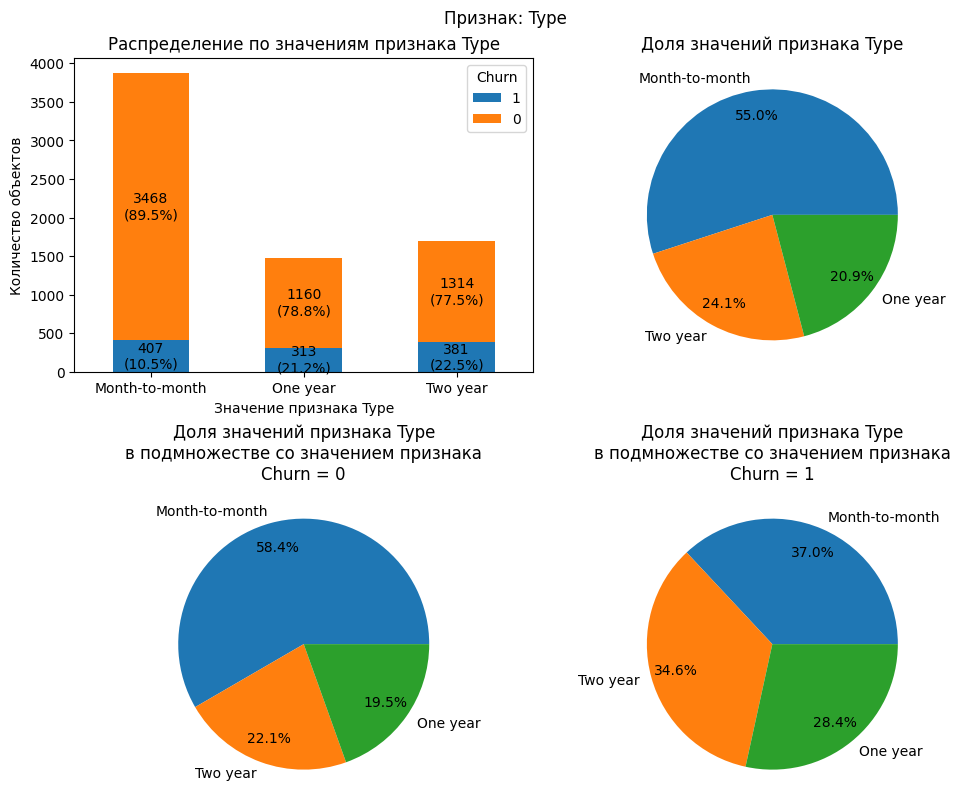

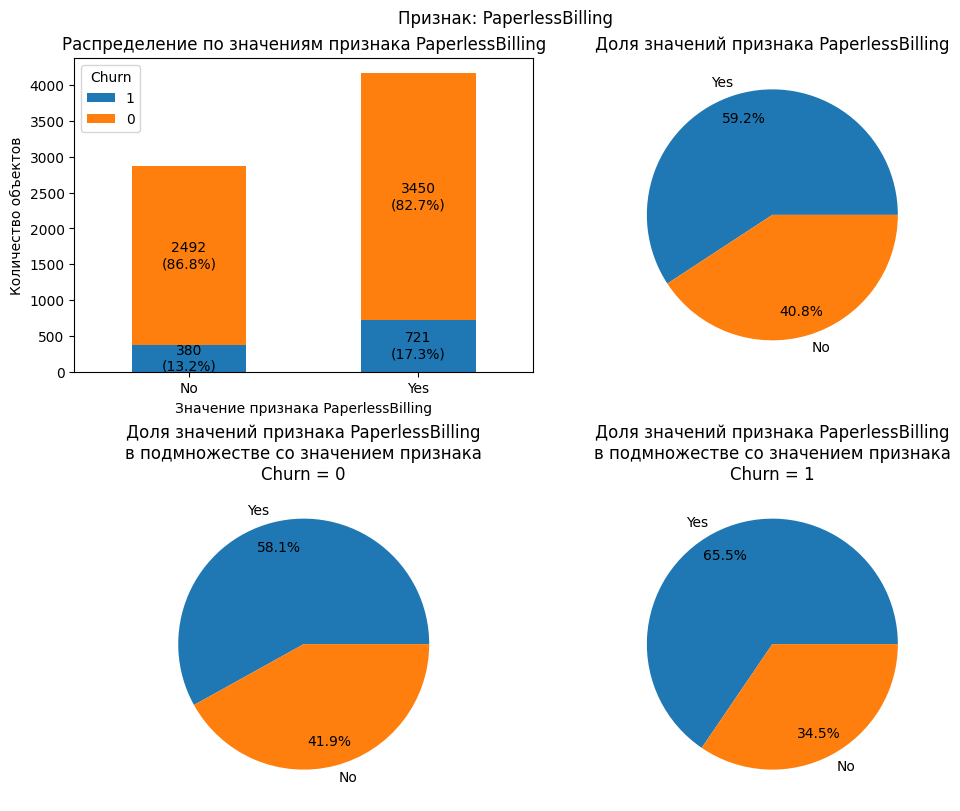

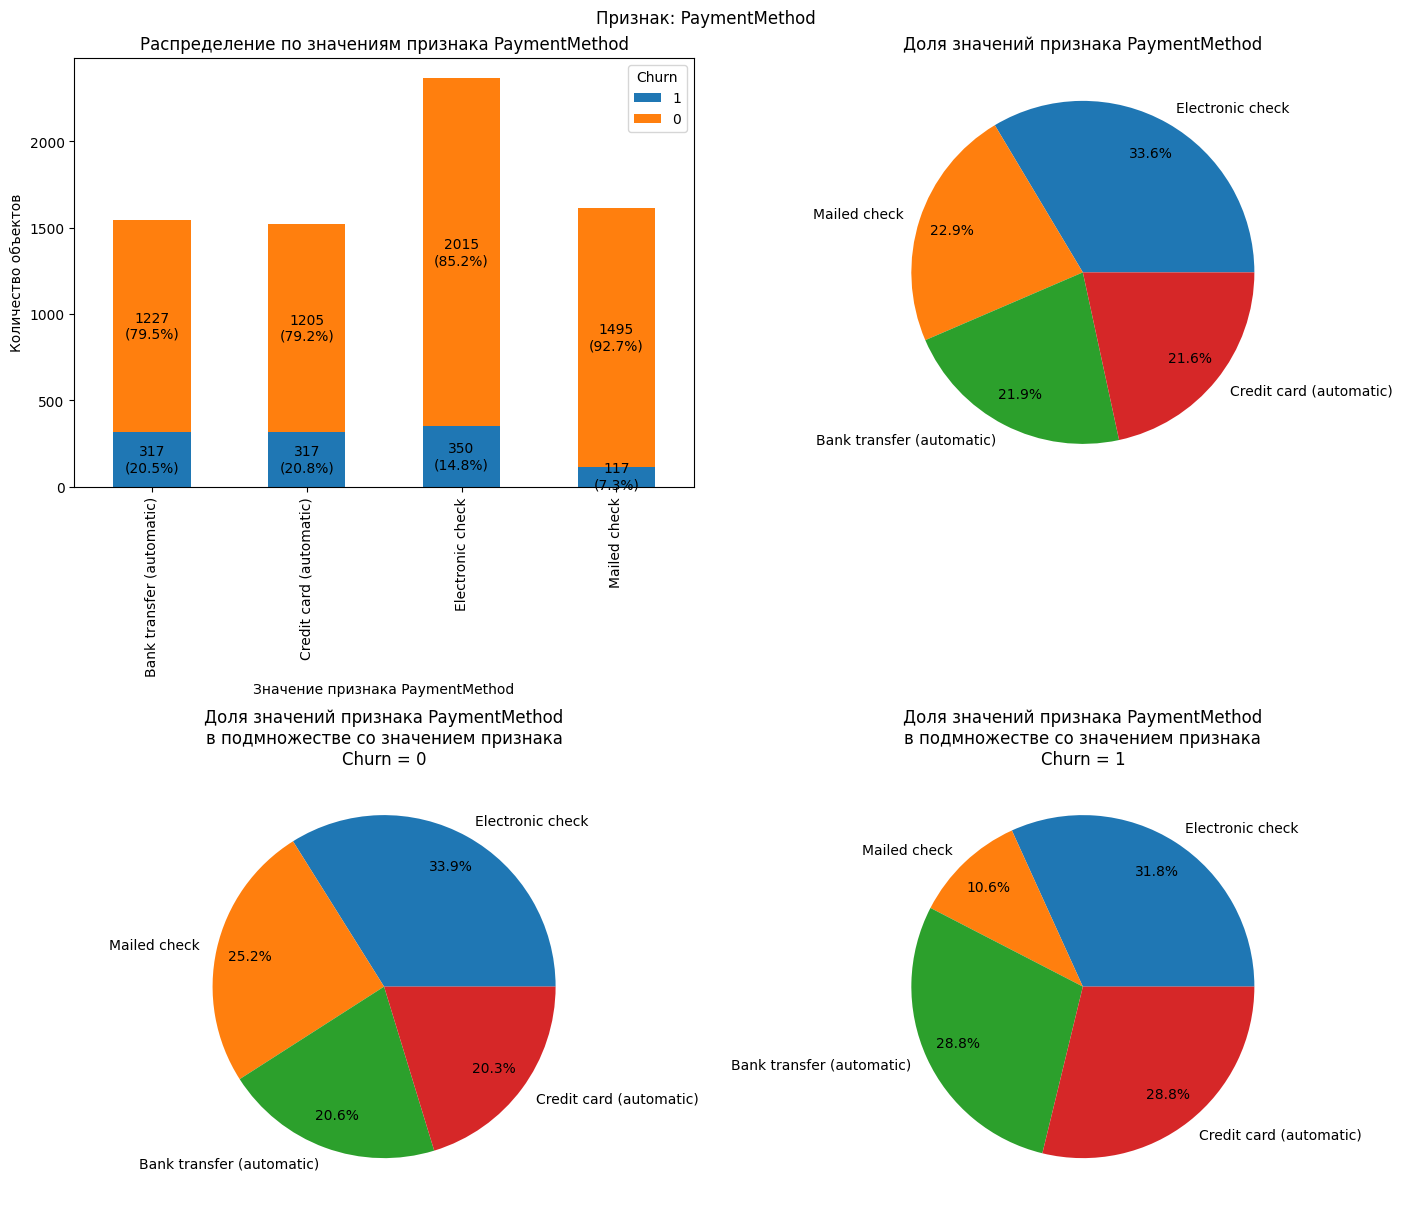

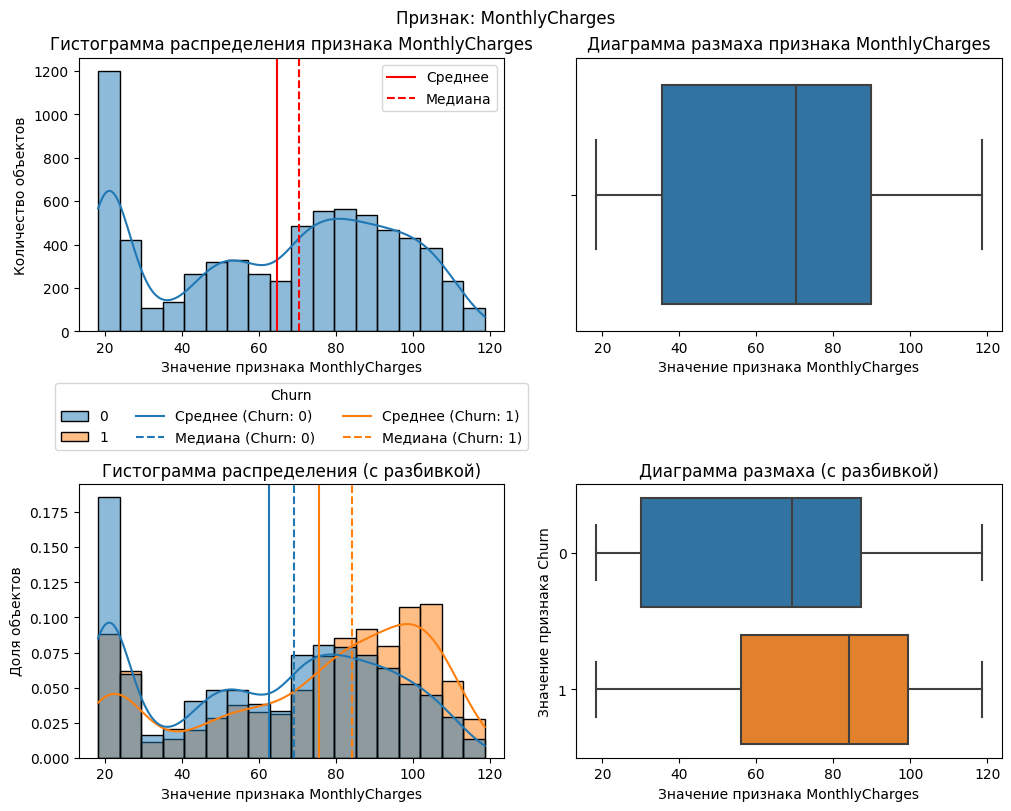

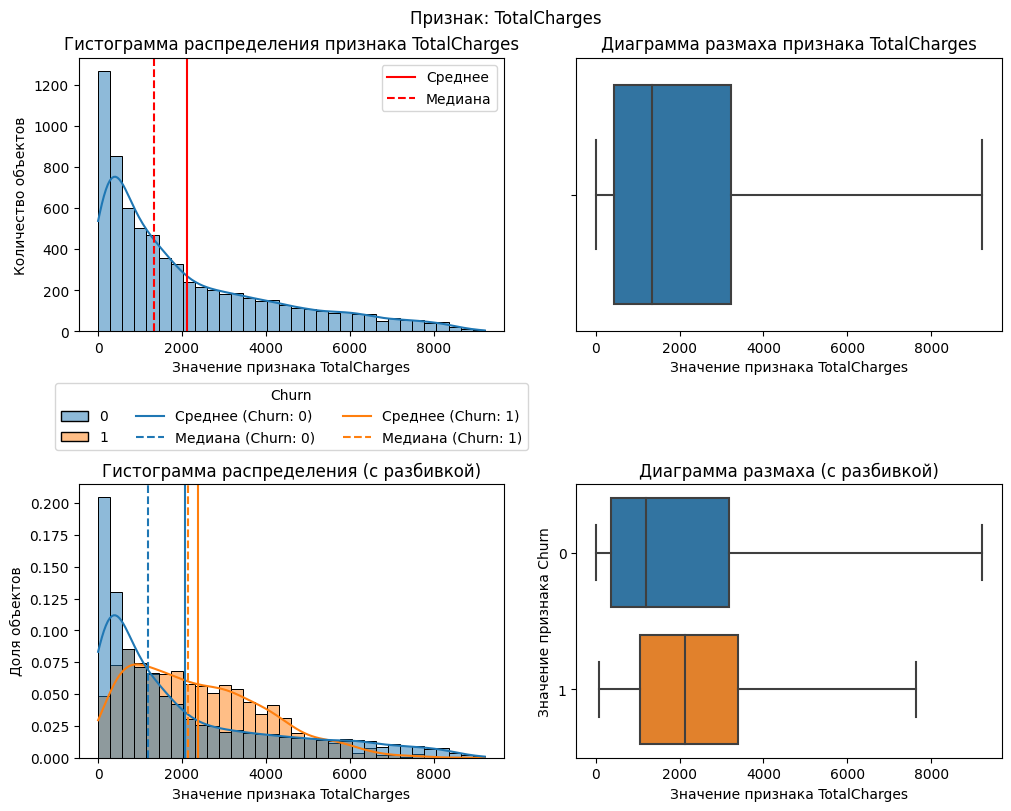

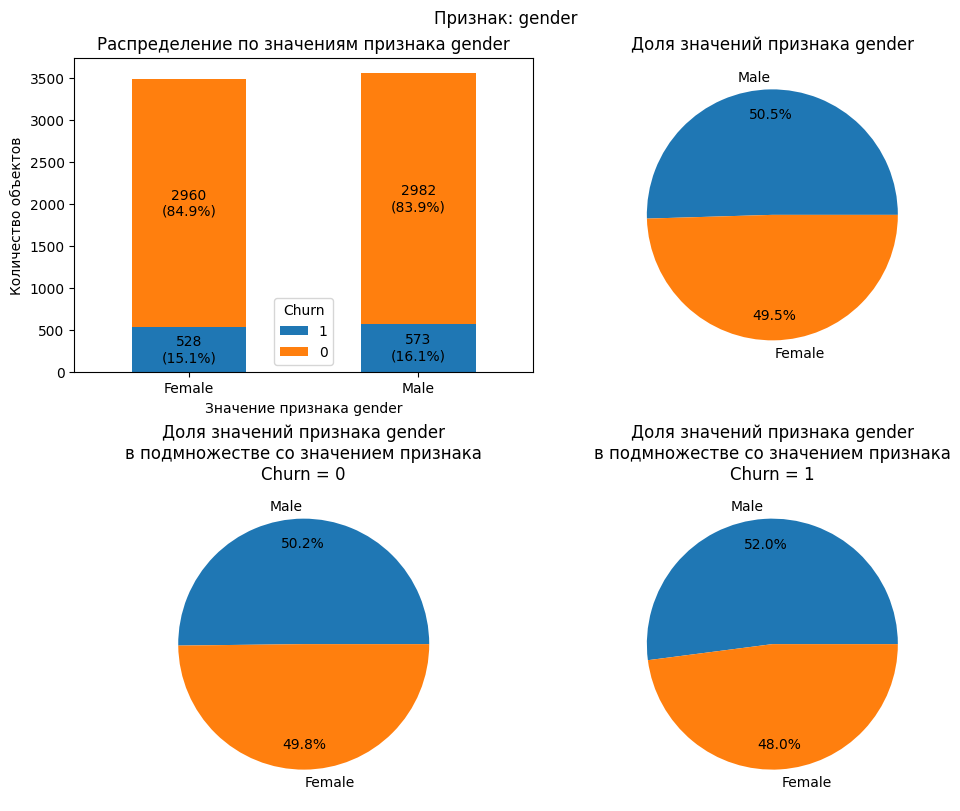

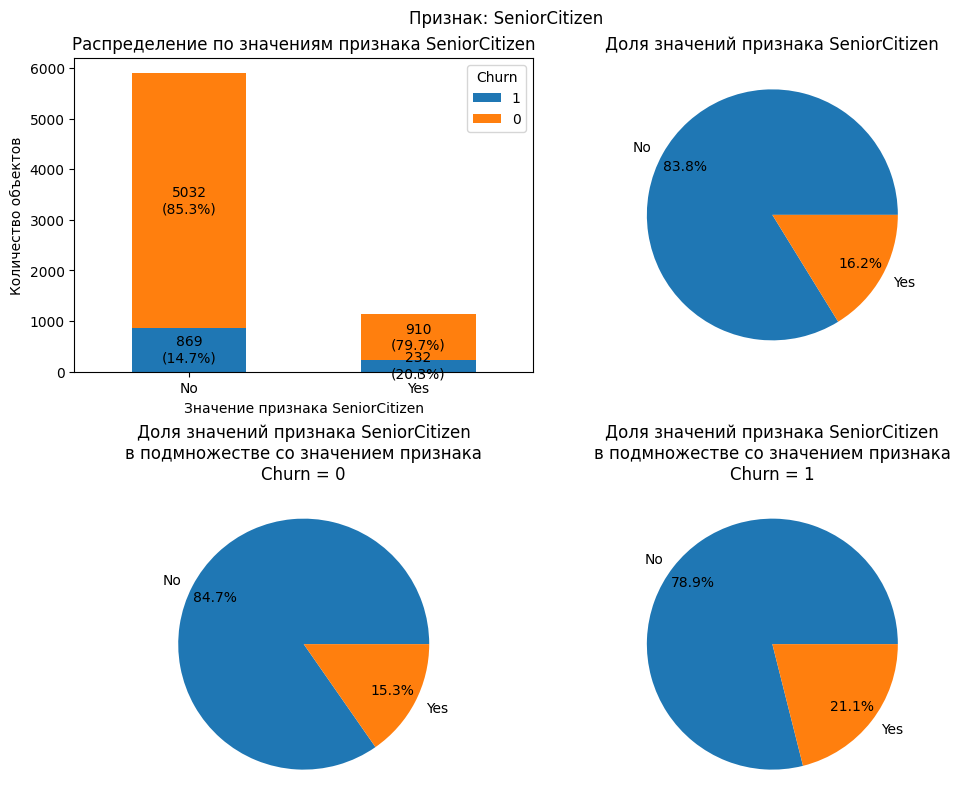

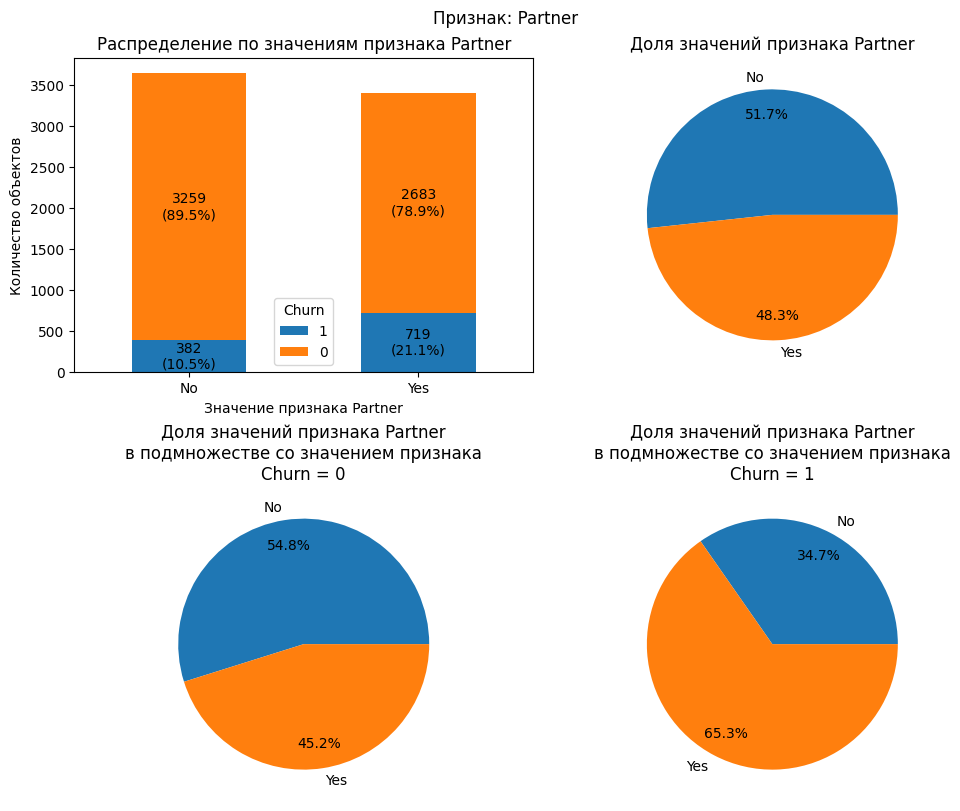

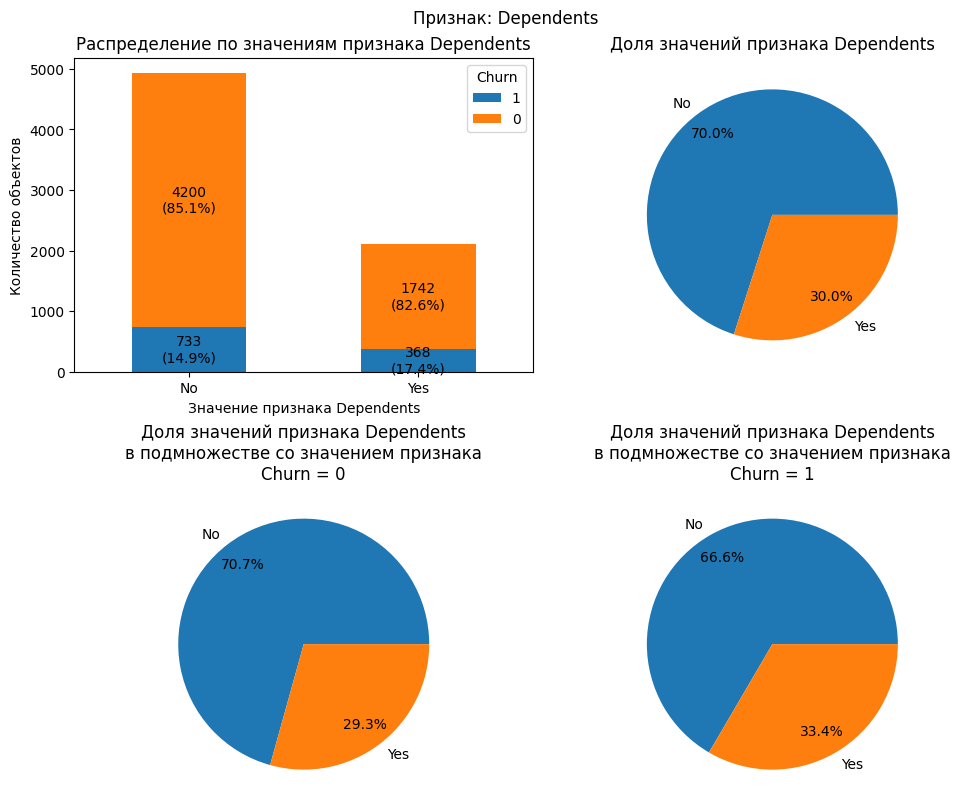

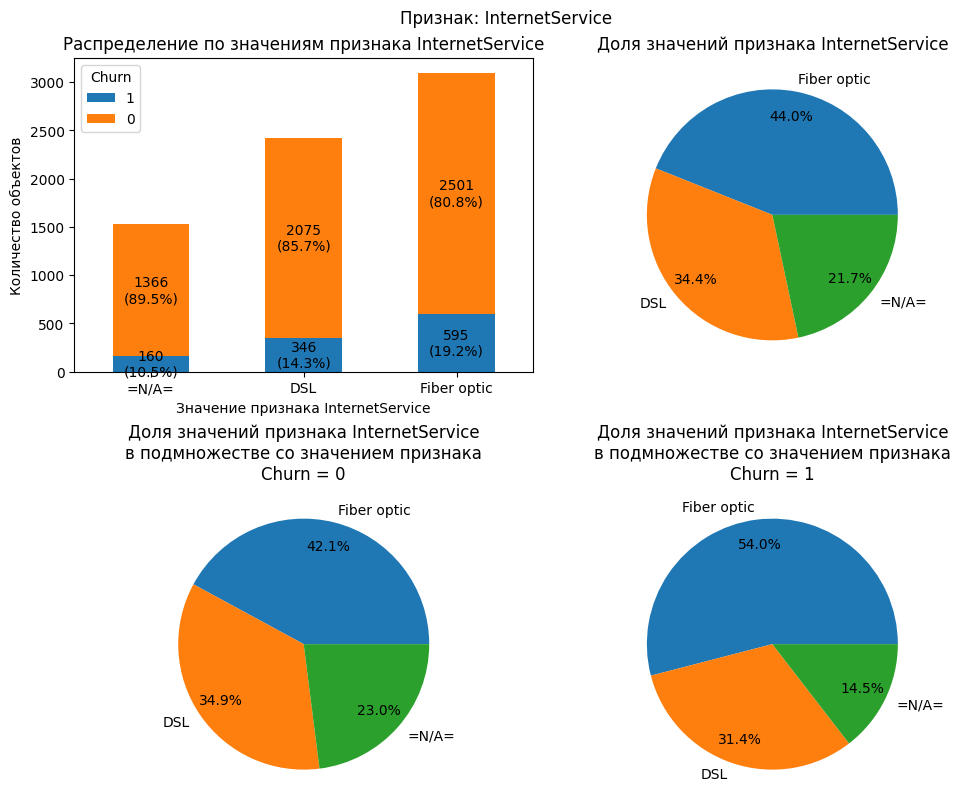

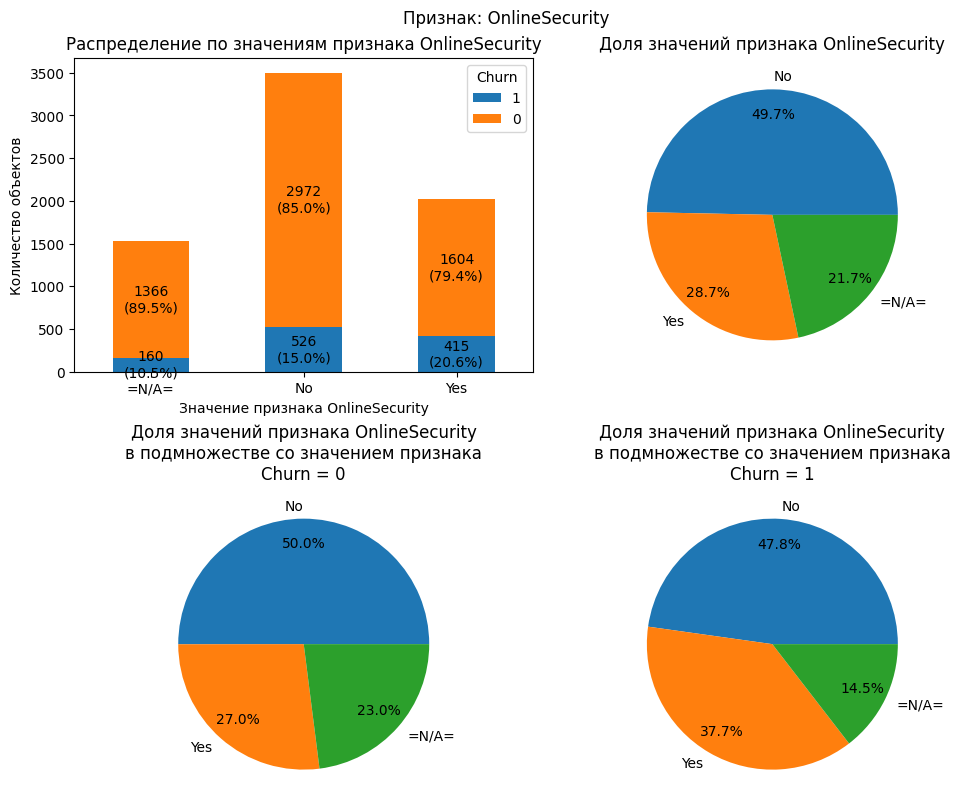

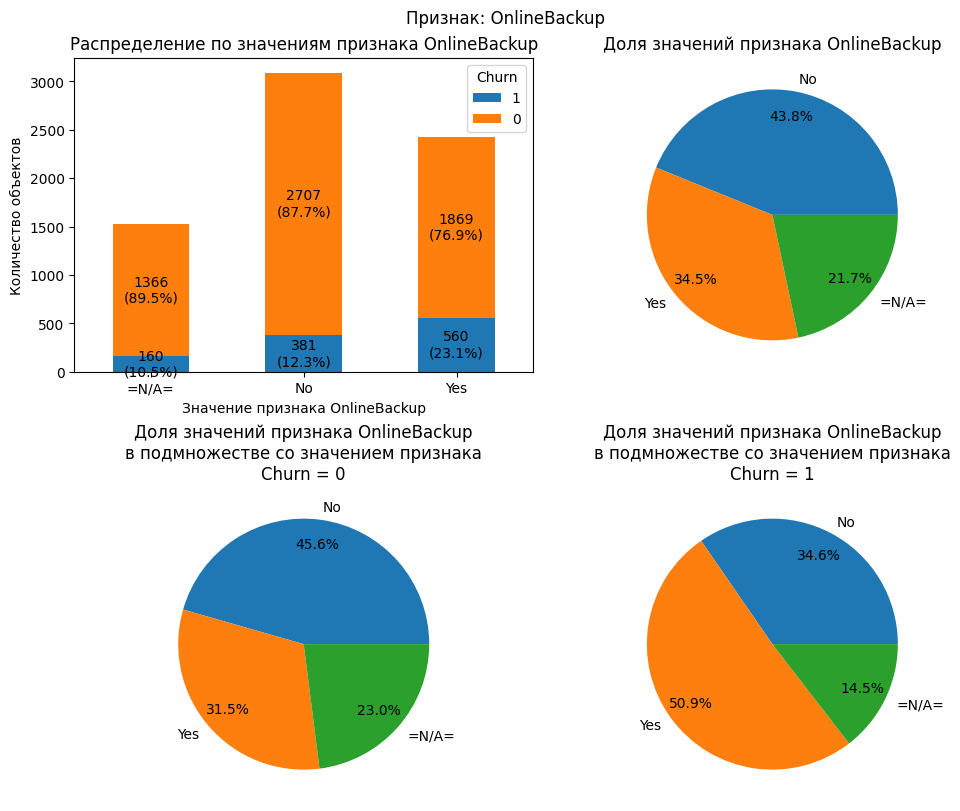

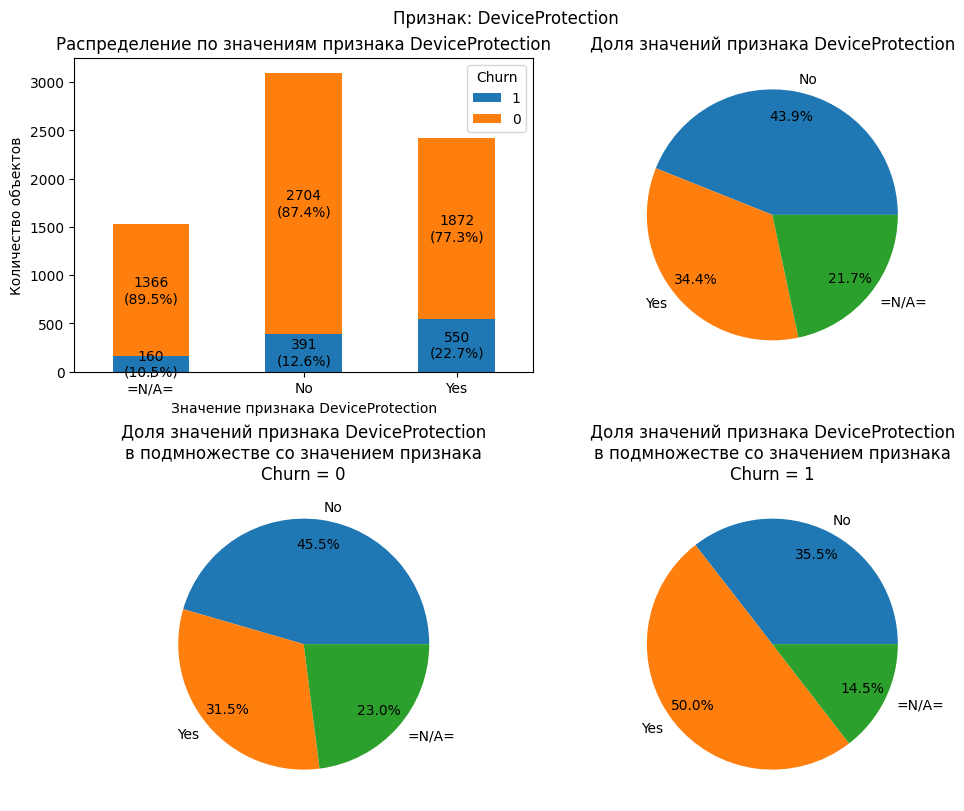

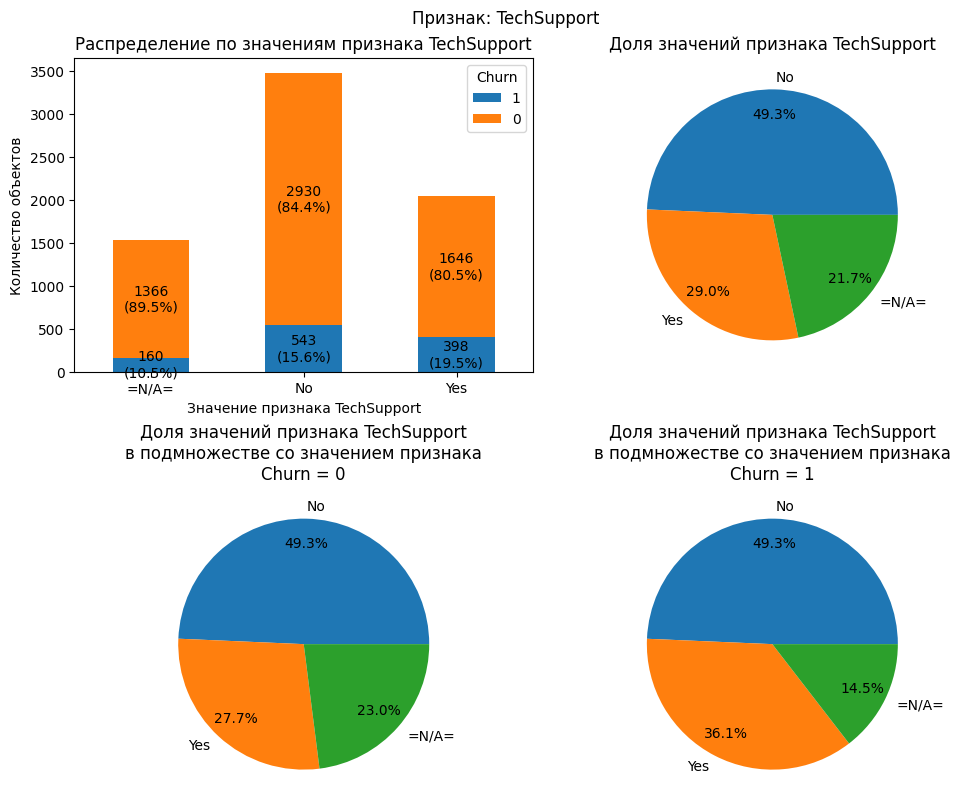

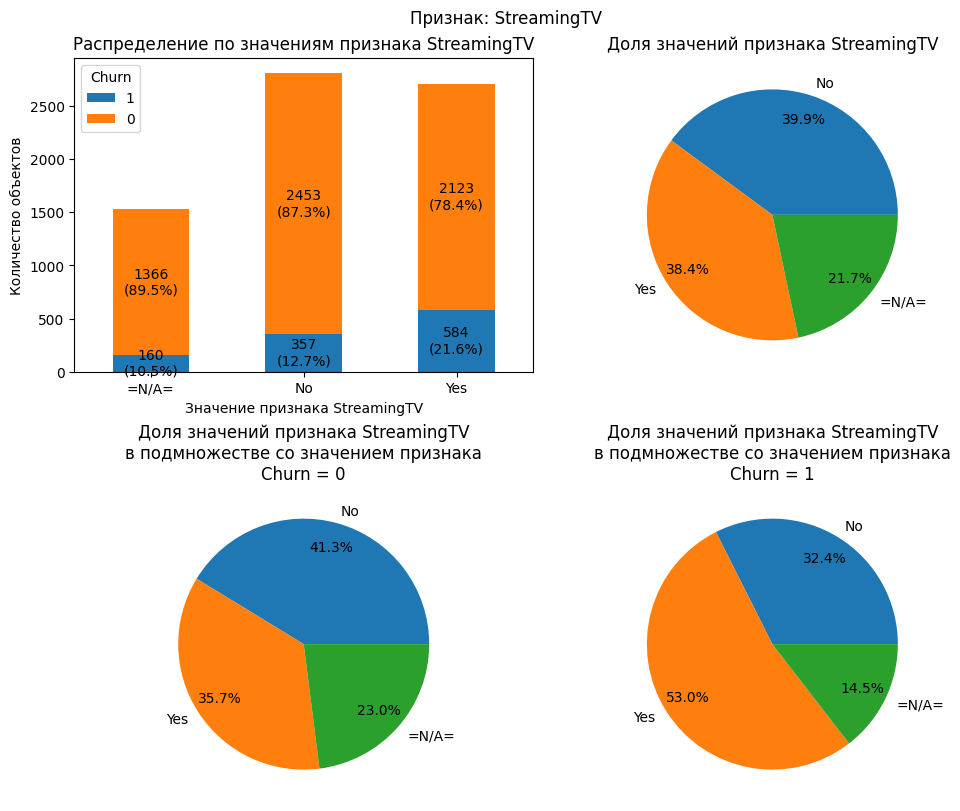

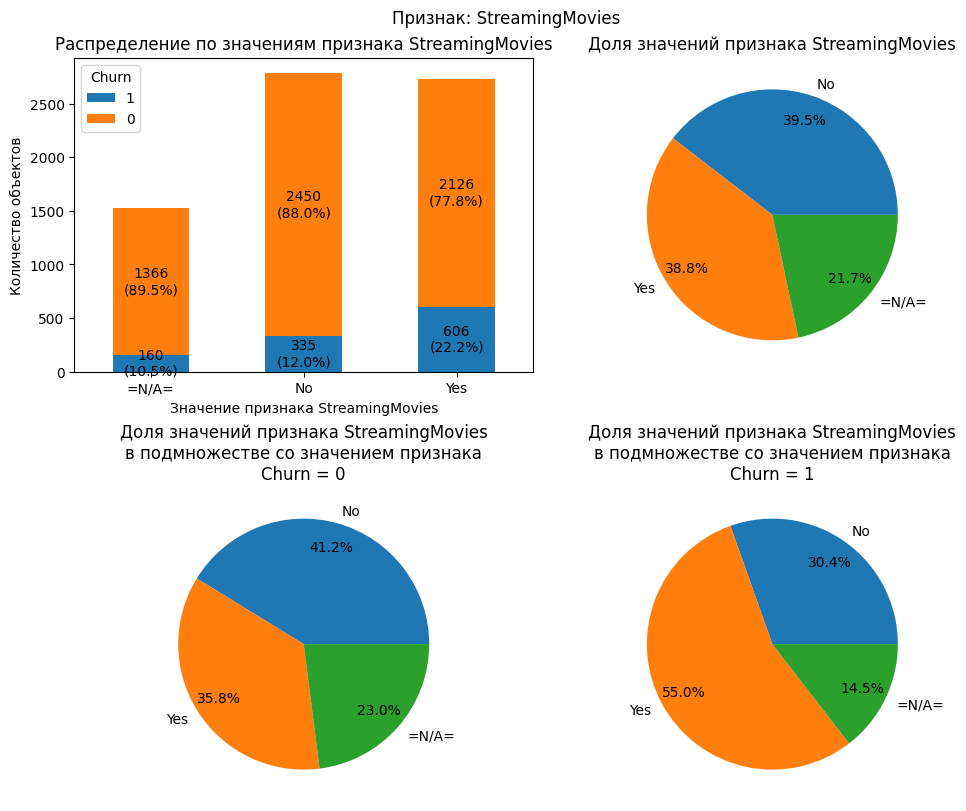

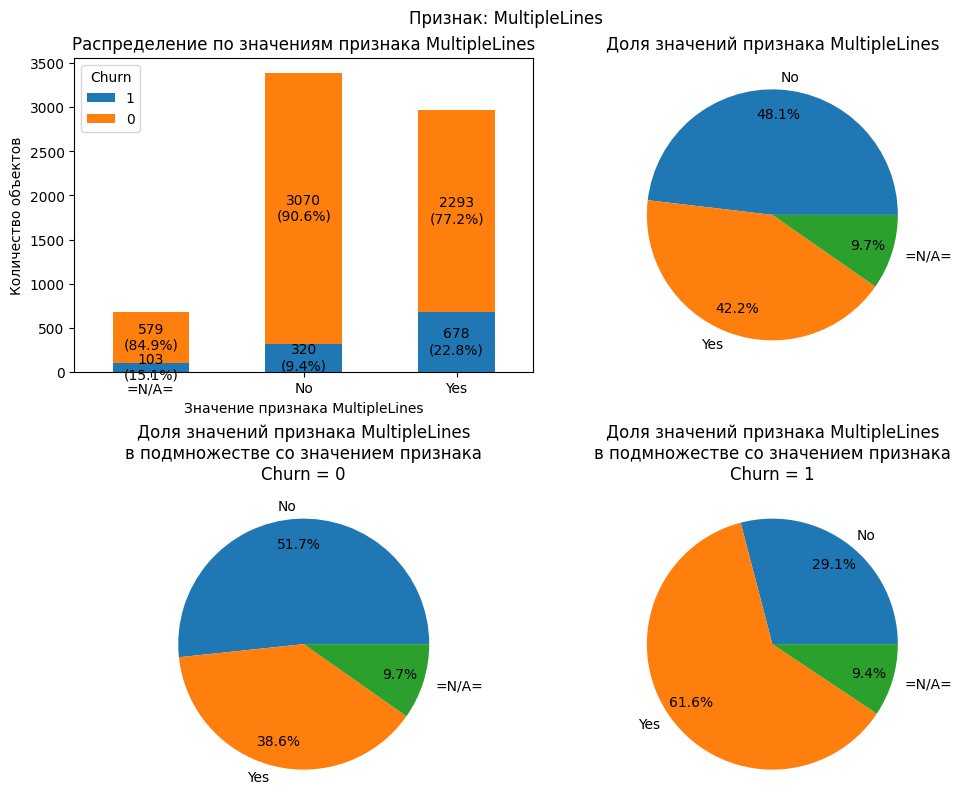

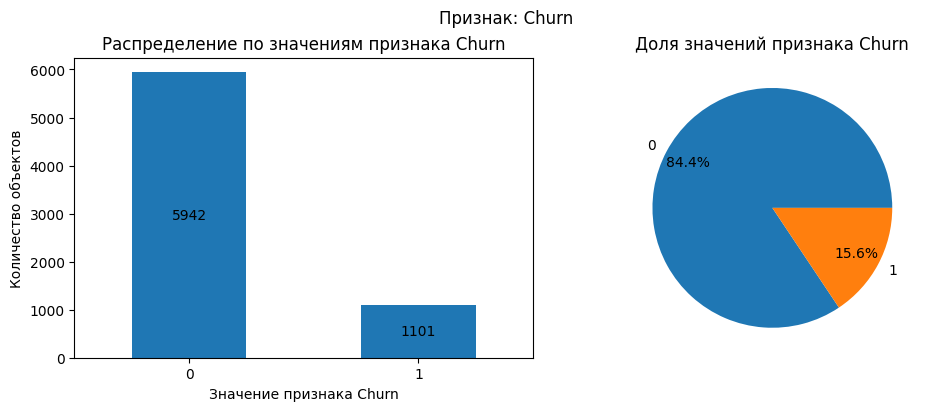

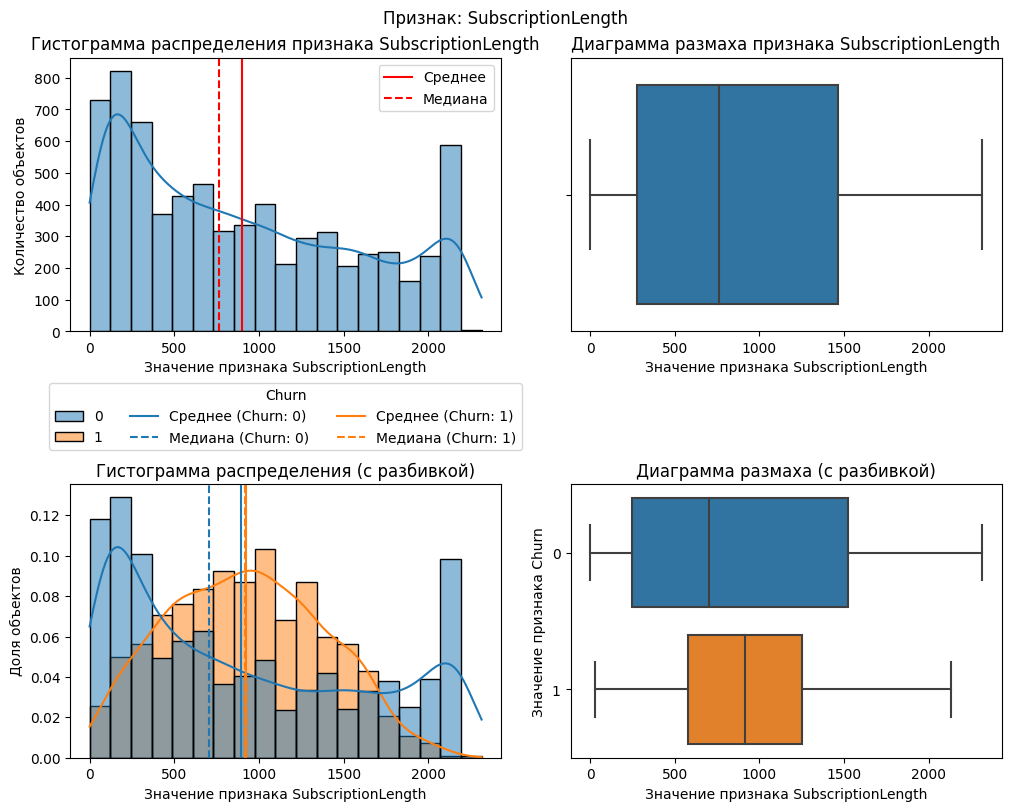

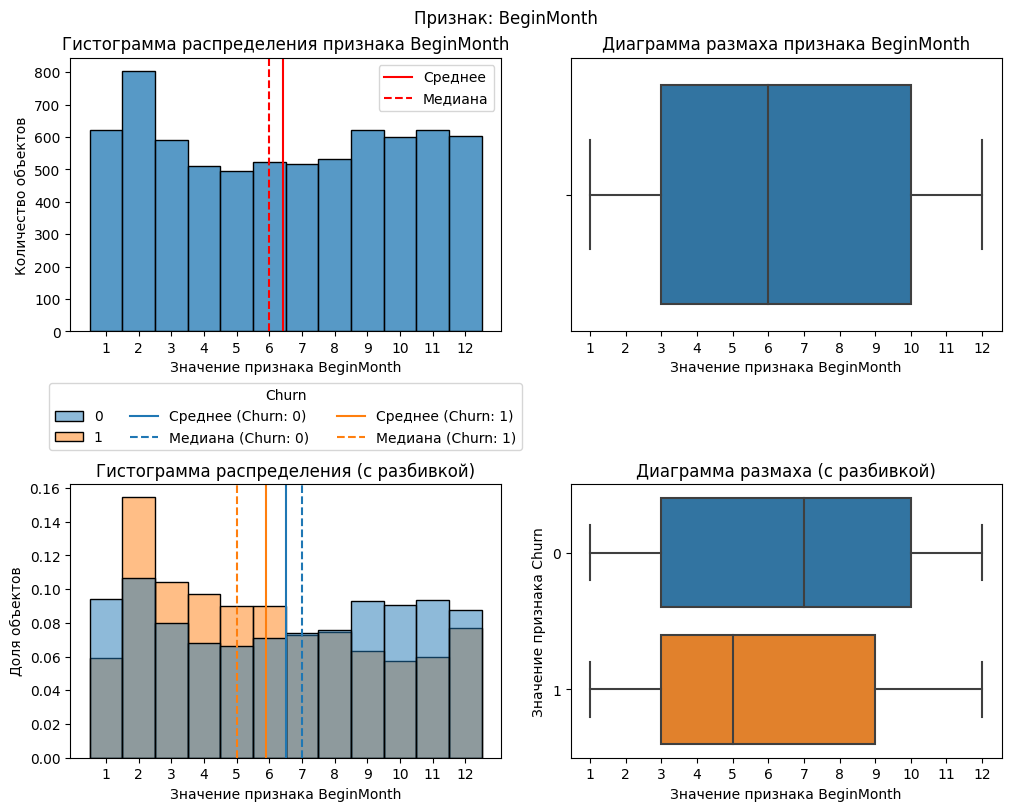

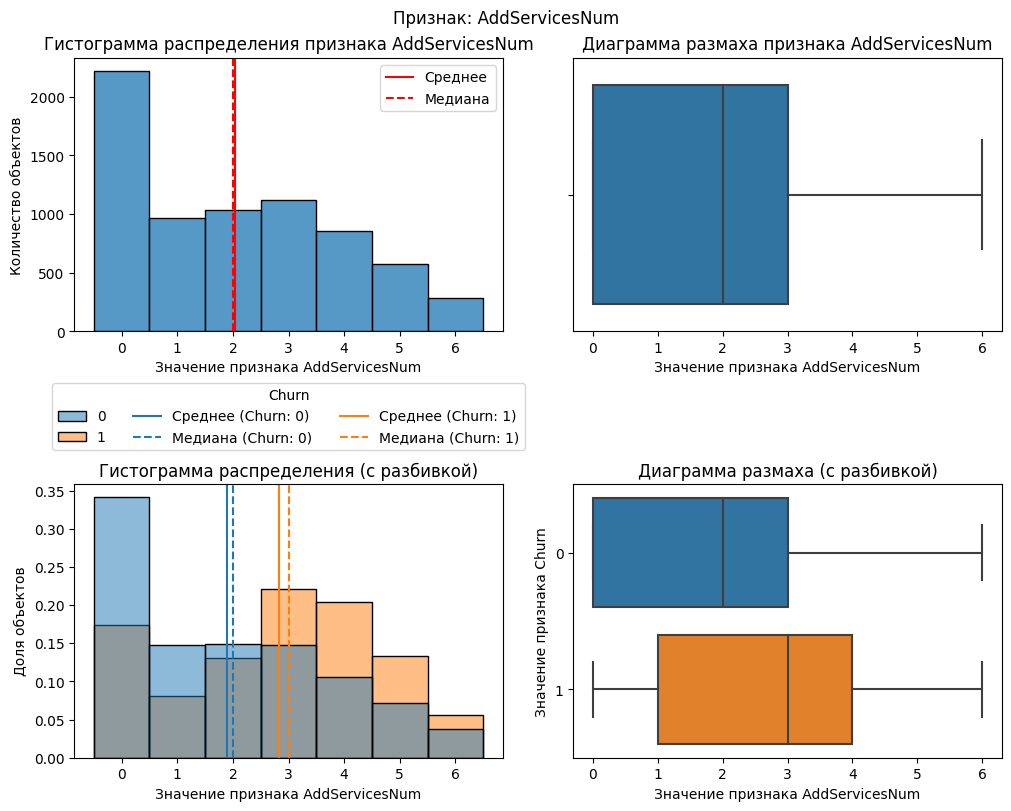

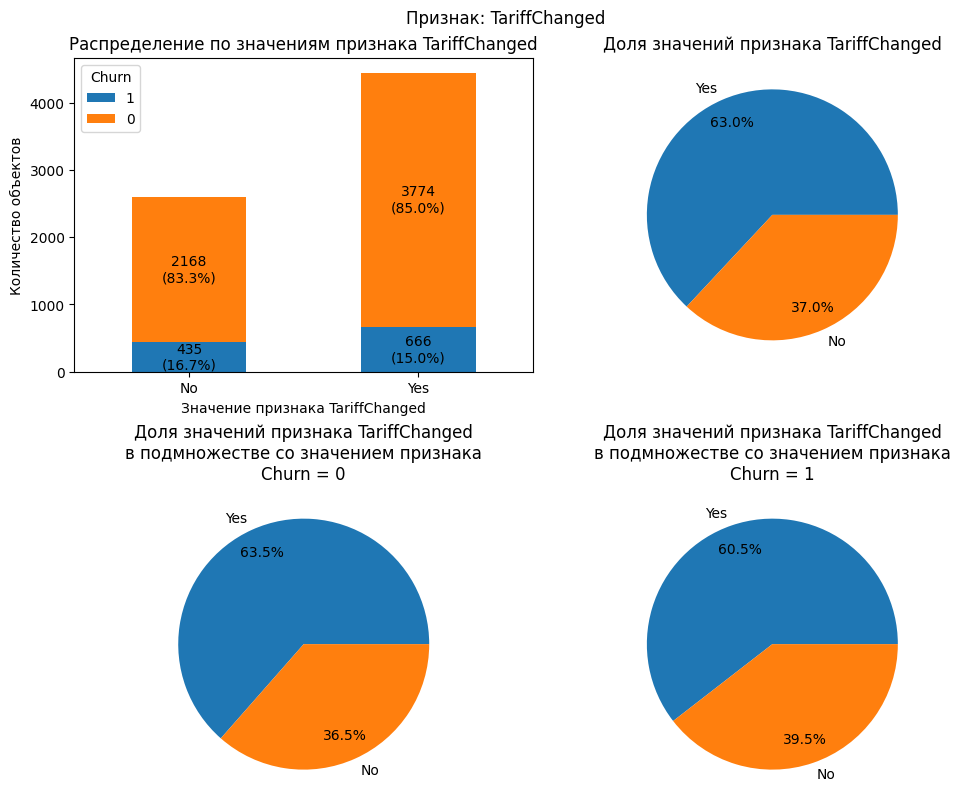

In [49]:
# строим графики для каждого признака
for feature in data.columns:
    stat_plots(data, feature, target='Churn')

1. Анализ распределений признаков выявил различия между ушедшими и остающимися абонентами:
    - Среди ушедших больше абонентов с высокими ежемесячными расходами, чем среди остающихся.
    - Среди оставшихся абонентов больше тех, у кого очень маленькие или очень большие общие расходы, тогда как среди ушедших больше тех, у кого средние расходы.
    - Среди ушедших преобладают абоненты со средним стажем, а абоненты с очень большим стажем и недавно подключённые более лояльны.
    - Среди ушедших больше доля подключившихся в период с февраля по июнь, а среди остающихся больше тех, кто подключился в период с сентября по январь.
    - Среди ушедших больше тех, кто пользуется дополнительными интернет-услугами, и среднее количество подключённых дополнительных услуг у них больше, чем у остающихся.
    
2. Анализ соотношения ушедших и остающихся абонентов в зависимости от значений категориальных признаков показал:
   - Отток выше среди абонентов с долгосрочными договорами, которые оплатили услуги сразу за 1 или 2 года.
   - Отток выше среди абонентов, подключивших электронный расчётный лист и пользующихся автоплатежами. 
   - Отток выше среди абонентов с подключёнными дополнительными интернет-услугами.
   - Отток выше, если абонент является пенсионером, у него есть супруг или супруга и если у него есть дети.
   - Отток выше среди тех, кто подключён по волоконно-оптической линии, а среди тех, кто вообще не подключён к интернету, отток ниже среднего.
   - Отток выше среди тех, кто пользуется услугой телефонии с подключением к нескольким линиям одновременно, и ниже среди тех, кто пользуется только одной телефонной линией.
   - Отток выше среди тех, кто не менял тариф за время действия договора.
   - Отток слабо зависит от пола абонента: разница оттока между мужчинами и женщинами не более 1 %.

3. Выбросы и аномалии в данных отсутствуют.

4. На основании результатов исследовательского анализа данных можно составить предварительный портрет типичного ушедшего абонента. Это абонент, подключившийся к оператору в период с февраля по июнь, оплативший услуги сразу за 1 или 2 года и не менявший тариф за время действия договора, с высокими ежемесячными расходами, пользующийся электронным расчётным листом и автоплатежами, подключённый к интернету по волоконно-оптической линии, с большим количеством подключённых дополнительных интернет-услуг, а также пользующийся услугой телефонии с подключением к нескольким линиям одновременно, являющийся пенсионером, имеющий супруга или супругу и имеющий детей.

5. В данных имеется умеренный дисбаланс классов по целевому признаку: доля ушедших составляет 15.6 % среди всех абонентов, представленных в данных. Этот факт нужно будет учесть при подготовке выборок и построении ML моделей.

### Анализ корреляций

Исследуем степень связи входных признаков друг с другом, чтобы определить характер и силу связи между каждым из входных признаков и целевым признаком, а также проверить входные признаки на мультиколлинеарность и утечку целевого признака. 

Для анализа связи целевого признака `Churn` в том числе и с категориальными признаками, которые преобладают в данных, рассчитаем матрицу коэффициентов корреляции фи ($\phi_k$) для всех признаков и визуализируем её в виде тепловой карты с помощью функции `corr_matrix()`, которая  использует метод `phik_matrix()` из библиотеки `phik`.

При использовании `phik_matrix()` нужно передать ему в аргументе `interval_cols`  список с названиями **непрерывных количественных признаков**, т.к. от типа признака зависит метод оценки корреляции.

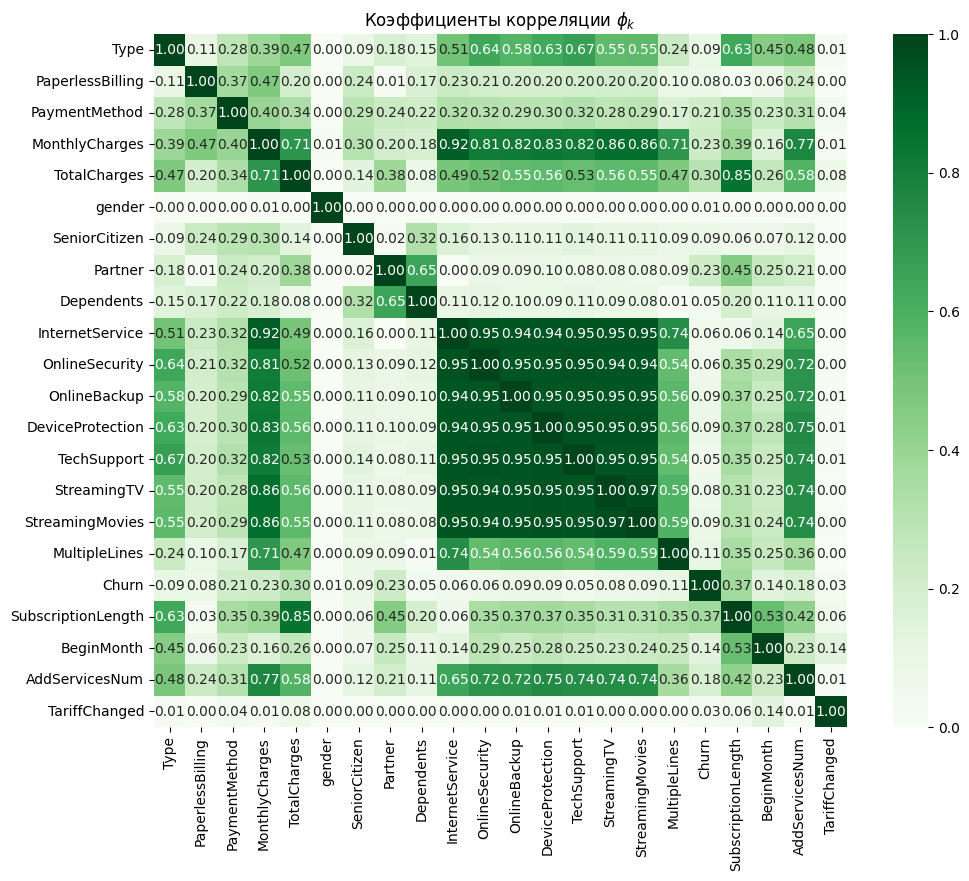

In [50]:
# список непрерывных количественных признаков
interval_cols = ['MonthlyCharges', 'TotalCharges', 'SubscriptionLength', 'AddServicesNum']

# создаём область построения графика
plt.figure(figsize=(12, 9))

# строим матрицу корреляции
corr_matrix(data, method='phik', interval_cols=interval_cols);

1. Среди входных признаков есть сильно коррелированные, у которых коэффициент корреляции больше 0.9:
    - `InternetService` и `MonthlyCharges` (0.92). Это корреляция не случайная. Исследуем её далее, построив график зависимости среднего уровня ежемесячных платежей от типа подключения к интернету.
    - `InternetService` и признаки использования дополнительных интернет-услуг: `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, причём они все также сильно коррелированы друг с другом. В зависимости от типа подключения абоненты пользуются чаще теми или иными дополнительными услугами. Связанные дополнительные услуги также чаще всего подключают вместе.

2. С целевым признаком `Churn` сильнее всего коррелируют признаки `SubscriptionLength` (0.37) и `TotalCharges` (0.30). 

3. Признак `gender` совершенно не коррелирует ни с одним из прочих признаков, включая целевой.

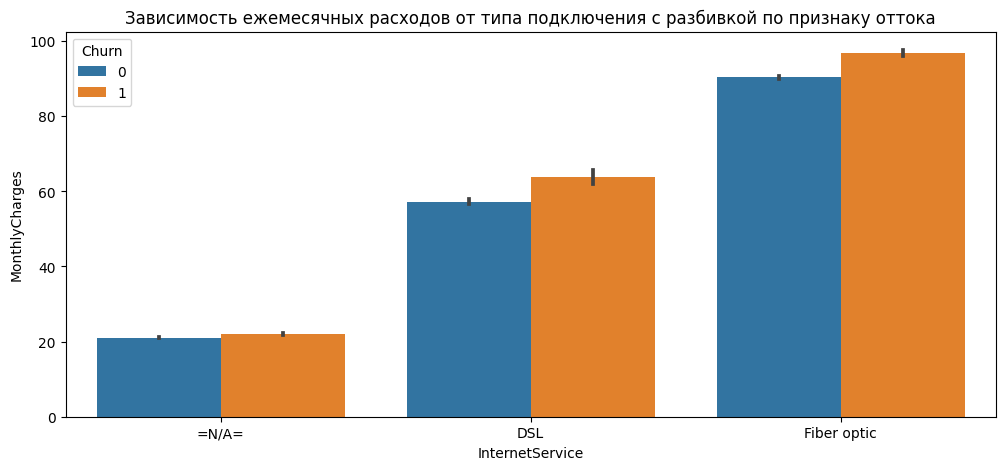

In [51]:
# строим график зависимости среднего значения 'MonthlyCharges' от 'InternetService'
sns.barplot(data=data, x='InternetService', y='MonthlyCharges', hue='Churn', order=sorted(data['InternetService'].unique()))
plt.title('Зависимость ежемесячных расходов от типа подключения с разбивкой по признаку оттока');

Абоненты, подключённые через волоконно-оптическую линию, в среднем платят больше. А те, кто не подключил интернет, в среднем платят меньше.

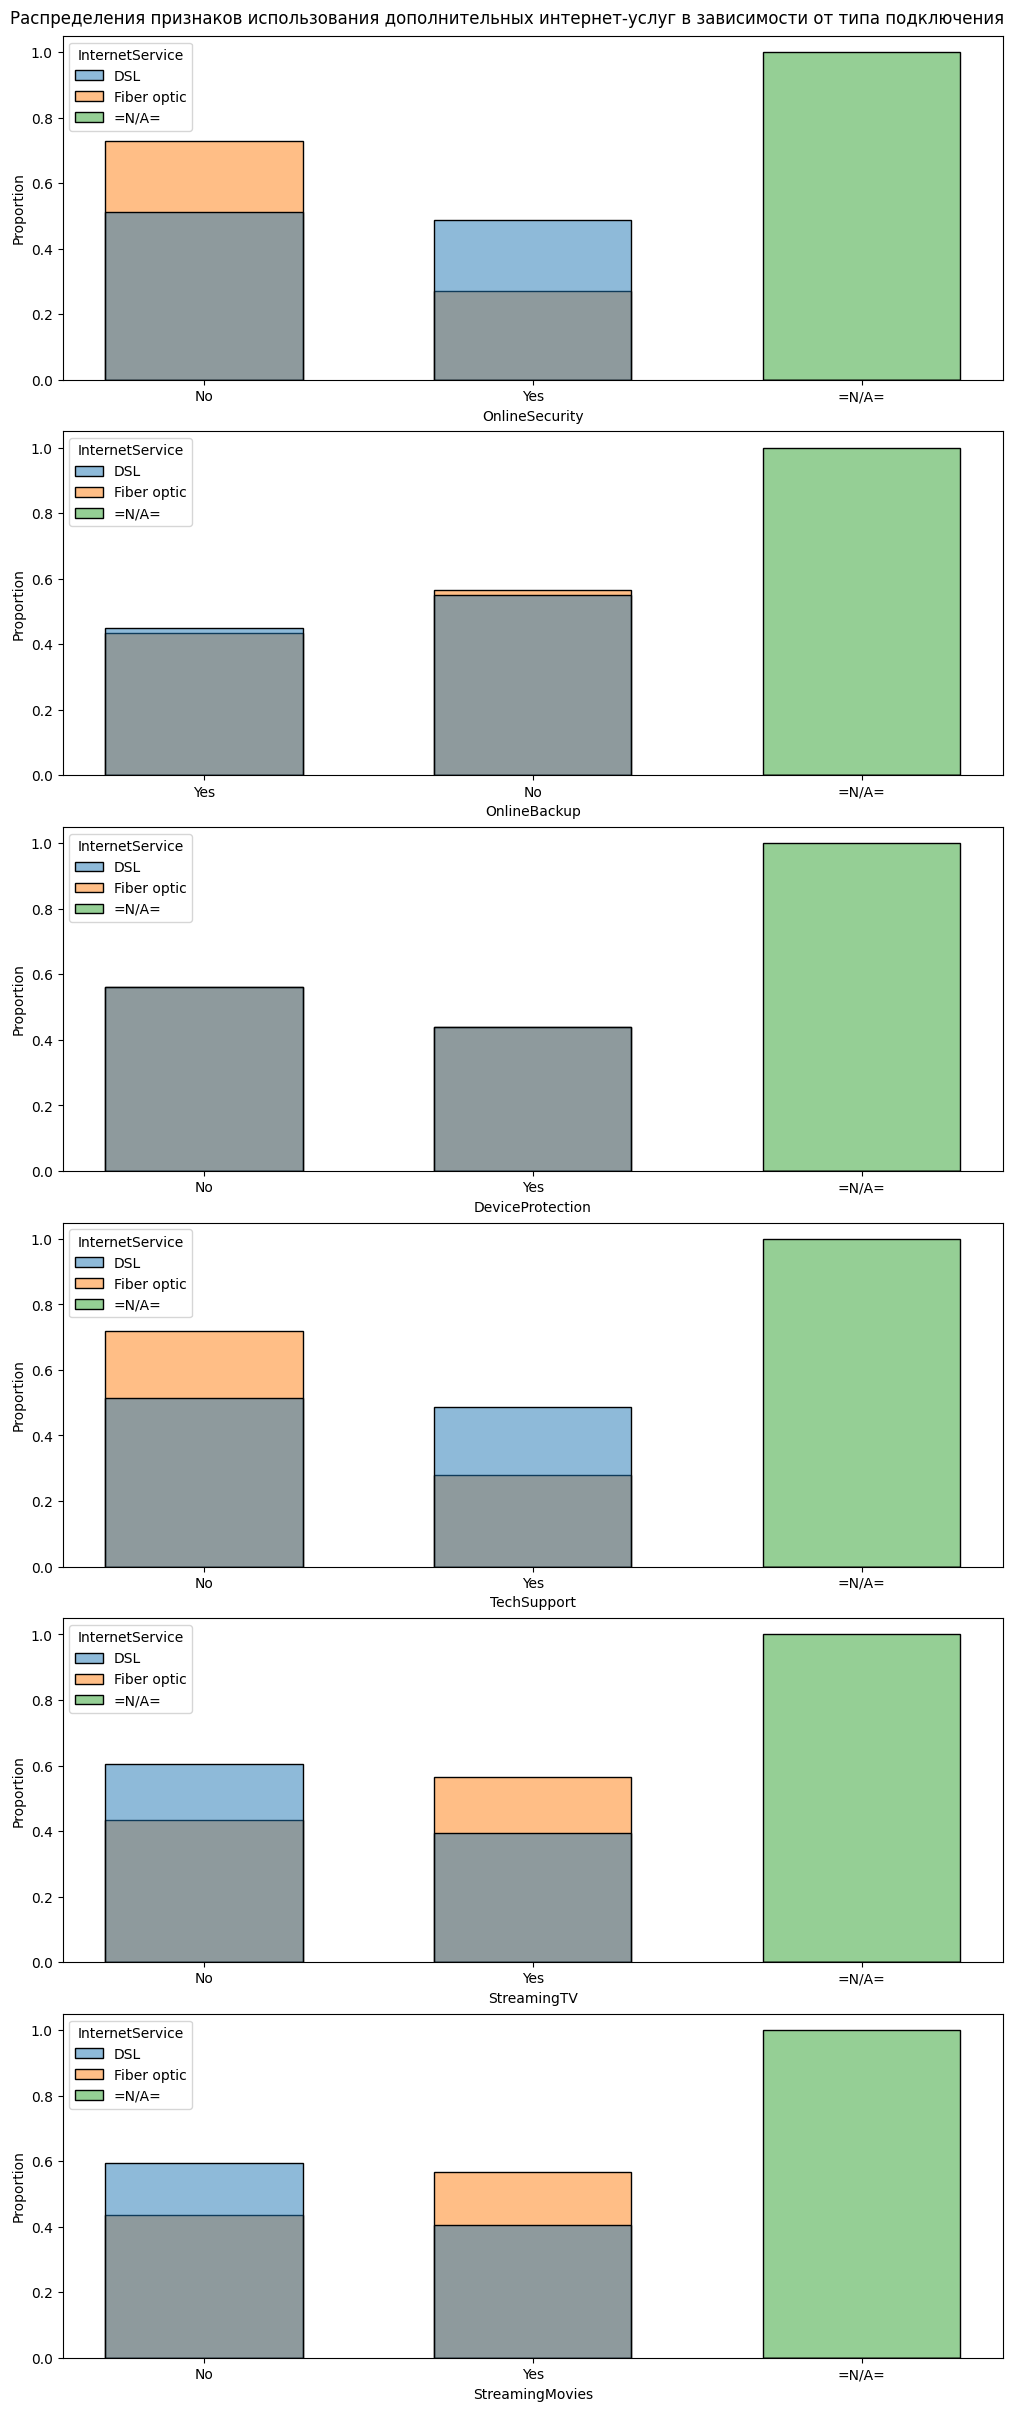

In [52]:
# количество графиков
n_plots = len(add_services_list)

# создаём область построения
fig, axes = plt.subplots(n_plots, 1, figsize=(10, 4 * n_plots), constrained_layout=True)

# строим графики распределений признаков в зависимости от типа подключения
for ax, col in zip(axes, add_services_list):
    sns.histplot(data=data, x=col, hue='InternetService', stat='proportion', common_norm=False, ax=ax, shrink=0.6)

fig.suptitle('Распределения признаков использования дополнительных интернет-услуг в зависимости от типа подключения');

Из графиков видно, что абоненты, подключённые по волоконно-оптической линии, меньше пользуются услугами `OnlineSecurity` и `TechSupport`, но чаще пользуются услугами видеостриминга `StreamingTV` и `StreamingMovies` (что логично, т.к. эти услуги требуют высокой скорости соединения).

### Выводы

1. Обработаны пропущенные значения признаков в объединённом датафрейме:
    - Пропущенные значения в столбце `TotalCharges` (общие расходы абонента) у новых абонентов, которые заключили договор в дату выгрузки данных, заполнены значением `0`. 
    - Пропущенные значения в категориальных признаках заполнены плейсхолдером `=N/A=` (N/A — not applicable). Первый знак `=` нужен для обеспечения нужного порядка сортировки значений, чтобы плейсхолдер был первым в списке.
    
2. Сгенерированы признаки, которые будут использованы для обучения ML моделей:
    - Целевой признак `Churn` (отток, т.е. прекратил ли абонент действие договора);
    - Дополнительные прогнозирующие признаки: 
        - `SubscriptionLength` — длительность подписки в днях, 
        - `BeginMonth` — месяц начала действия договора, 
        - `AddServicesNum` — количество подключённых дополнительных интернет-услуг, 
        - `TariffChanged` — факт смены тарифа.

3. Проведён исследовательский анализ распределений признаков и корреляций между ними с целью отбора полезных прогнозирующих признаков для обучения ML моделей. Признак полезен, если он коррелирует с целевым или распределения по значениям признака различны для различных значений целевого признака.

    - Исследовательский анализ выявил различия в распределениях по значениям признаков между ушедшими и остающимися абонентами для большинства признаков. Исключением является признак `gender` (пол абонента), разница в распределении которого между ушедшими и остающимися абонентами незначительна.
    
    - В данных обнаружен умеренный дисбаланс классов по целевому признаку: доля ушедших составляет 15.6 % среди всех абонентов, представленных в данных. Этот факт нужно будет учесть при подготовке выборок и построении ML моделей.
    
    - Анализ корреляций выявил сильно связанные признаки. Наличие сильной корреляции (мультиколлинеарность) между входными признаками может отрицательно сказаться на качестве и интерпретируемости ML моделей, особенно линейных. Поэтому по возможности из набора коррелированных признаков следует оставить только один.
    
    - Корреляции прогнозирующих признаков с целевым невелики (<0.4), однако учёт большого количества признаков в совокупности может повысить качество предсказаний ML модели.

4. На основании результатов исследовательского анализа данных составлен предварительный портрет типичного ушедшего абонента. Это абонент, подключившийся к оператору в период с февраля по июнь, оплативший услуги сразу за 1 или 2 года и не менявший тариф за время действия договора, с высокими ежемесячными расходами, пользующийся электронным расчётным листом и автоплатежами, подключённый к интернету по волоконно-оптической линии, с большим количеством подключённых дополнительных интернет-услуг, а также пользующийся услугой телефонии с подключением к нескольким линиям одновременно, являющийся пенсионером, имеющий супруга или супругу и имеющий детей. Этот портрет будет впоследствии уточнён по результатам анализ значимости признаков для построенной ML модели, прогнозирующей отток клиентов.

## Подготовка данных для обучения моделей

### Выделение прогнозирующих и целевого признаков

Составим списки категориальных и количественных признаков, которые будут использованы в ML модели, предсказывающей вероятность оттока клиентов оператора связи.

Используем имеющиеся в исходных данных признаки, характеризующие абонента: 
- Категориальные: 
    - `Type` — тип оплаты; 
    - `PaperlessBilling` — электронный расчётный лист; 
    - `PaymentMethod` — тип платежа; `SeniorCitizen` — статус пенсионера; 
    - `Partner` — наличие супруга или супруги; `Dependents` — наличие детей; 
    - `InternetService` — тип подключения; 
    - `MultipleLines` — подключение телефона к нескольким линиям одновременно; 
- Количественные: 
    - `MonthlyCharges` — расходы за месяц; 
    - `TotalCharges` — общие расходы абонента.

Также используем новые признаки, сгенерированные на основе исходных:
- Категориальные: 
    - `BeginMonth` — месяц начала действия договора. Этот календарный признак важно рассматривать как категориальный, чтобы правильно учесть его цикличность; 
    - `TariffChanged` — факт смены тарифа;
- Количественные: 
    - `SubscriptionLength` — длительность подписки в днях; 
    - `AddServicesNum` — количество дополнительных интернет-услуг, используемых абонентом.

Неиспользуемыми останутся признаки:
- `gender` (пол абонента). Как показал анализ, он не влияет на вероятность оттока клиента.
- Признаки использования отдельных дополнительных интернет-услуг, потому что все они сильно коррелируют друг с другом. Использование дополнительных услуг учтено с помощью признака `AddServicesNum`.
- `BeginDate` и `EndDate` — даты начала и окончания действия договора. Они были использованы для расчёта признаков `SubscriptionLength` и `BeginMonth`, а также целевого признака `Churn`. Использовать `BeginDate` непосредственно нельзя, т.к. тогда модель не сможет работать с новыми данными. Использовать `EndDate` и её компоненты нельзя, т.к. это приведёт к утечке целевого признака.

In [53]:
# категориальные признаки
cat_columns = [
    'Type', 
    'PaperlessBilling', 
    'PaymentMethod', 
    'SeniorCitizen', 
    'Partner', 
    'Dependents', 
    'InternetService', 
    'MultipleLines', 
    'BeginMonth',
    'TariffChanged',
]

# количественные признаки
num_columns = [
    'MonthlyCharges', 
    'TotalCharges', 
    'SubscriptionLength', 
    'AddServicesNum'
]

print('Категориальные признаки:', cat_columns)
print('Количественные признаки:', num_columns)
print('Всего {} входных признаков, из них {} количественных и {} категориальных.'
      .format(len(num_columns + cat_columns),
              len(num_columns),
              len(cat_columns)
             ),
     )

Категориальные признаки: ['Type', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 'MultipleLines', 'BeginMonth', 'TariffChanged']
Количественные признаки: ['MonthlyCharges', 'TotalCharges', 'SubscriptionLength', 'AddServicesNum']
Всего 14 входных признаков, из них 4 количественных и 10 категориальных.


Выделим в отдельные переменные прогнозирующие (входные) признаки и целевой признак.

In [54]:
# входные признаки
X = data[num_columns + cat_columns]

# целевой признак
y = data['Churn'].astype(int)

### Разделение обучающей и тестовой выборок

Разделим данные на обучающую и тестовую выборки в пропорции 3:1 стратифицированным образом по целевому признаку, чтобы соотношение классов в выборках было таким же, как во всём датасете в целом.

In [55]:
# разделяем обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.25, 
    stratify=y,
    random_state=RANDOM_STATE,
)

print('Размер обучающей выборки:', X_train.shape[0])
print('Размер тестовой выборки:', X_test.shape[0])
print('Количество входных признаков:', X_train.shape[1])

Размер обучающей выборки: 5282
Размер тестовой выборки: 1761
Количество входных признаков: 14


Проверим стратифицированность выборок по целевому признаку.

In [56]:
# считаем доли классов для всех данных и для каждой выборки
y.value_counts(normalize=True).rename('all').to_frame().join([
    y_train.value_counts(normalize=True).rename('train'),
    y_test.value_counts(normalize=True).rename('test')
]).rename_axis('Churn').round(4)

all   train    test
Churn                        
0      0.8437  0.8436  0.8438
1      0.1563  0.1564  0.1562

Выборки — стратифицированные.

### Выводы

1. Прогнозирующие признаки и целевой признак (отток) выделены в отдельные переменные. В качестве прогнозирующих признаков (предикторов) наряду с признаками из исходных данных (за исключением пола абонента, фактов использования отдельных дополнительных интернет-услуг и дат начала и окончания действия договора) использованы новые признаки:
    - месяц начала действия договора, который рассматривается как категориальный, чтобы правильно учесть его цикличность; 
    - факт смены тарифа;
    - длительность подписки в днях; 
    - количество дополнительных интернет-услуг, используемых абонентом.
    
2. Подготовленные данные разделены на обучающую и тестовую выборки в пропорции 3:1 стратифицированным образом по целевому признаку.

## Обучение моделей

### Логистическая регрессия

Логистическая регрессия — это базовая линейная модель для задачи бинарной классификации.

Для линейной модели требуется подготовка данных — кодирование категориальных признаков и масштабирование количественных. Для подготовки данных включим в пайплайн модели `ColumnTransformer`, который позволяет применить различные преобразования к разным признакам:
- категориальные признаки закодируем с помощью `OneHotEncoder`.
- количественные признаки масштабируем с помощью `StandardScaler`.

Для учёта дисбаланса классов зададим параметр `class_weight='balanced'`.

Чтобы попробовать разные варианты регуляризации (L1 или L2), нужно использовать `solver='liblinear'`.

In [57]:
# пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('encoder', 
         OneHotEncoder(
            drop='first', 
            handle_unknown='ignore', 
            sparse_output=False), 
         cat_columns),
        ('scaler', 
         StandardScaler(), 
         num_columns),
    ], 
    remainder='drop',
    verbose_feature_names_out=False,
)

# модель
logreg_model = LogisticRegression(
    class_weight='balanced',
    solver='liblinear',
    # max_iter=1000,
    random_state=RANDOM_STATE
)

# итоговый пайплайн
logreg_pipe = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('estimator', logreg_model)
    ]
)

print('Пайплайн модели:')
logreg_pipe

Пайплайн модели:


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Type', 'PaperlessBilling',
                                                   'PaymentMethod',
                                                   'SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'InternetService',
                                                   'MultipleLines',
                                                   'BeginMonth',
                                                   'TariffChanged']),
                                                 ('scaler', StandardScaler(),
                                                  ['MonthlyCharges',
                                                   'TotalCharges',
                                                   'SubscriptionLength',
                                                   'AddServicesNum'])],
                                   verbose_feature_names_out=False)),
                ('estimator',
                 LogisticRegression(class_weight='balanced', random_state=50525,
                                    solver='liblinear'))])

В данной задаче качество моделей оценивается метрикой ROC-AUC — это площадь под кривой ROC (зависимость количества верно классифицированных положительных объектов от количества неверно классифицированных отрицательных).

Оценим качество модели, рассчитав метрику ROC-AUC при кросс-валидации по 5 блокам на обучающей выборке.

In [58]:
%%time
# метрика ROC-AUC при кросс-валидации на обучающей выборке
cv_score = cross_val_score(
    logreg_pipe, 
    X_train, 
    y_train, 
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=0
).mean()
print(f'Метрика ROC-AUC модели при кросс-валидации на обучающей выборке: {cv_score:.4f}')
print()

Метрика ROC-AUC модели при кросс-валидации на обучающей выборке: 0.7584

CPU times: user 82.1 ms, sys: 9.83 ms, total: 91.9 ms
Wall time: 916 ms


Попробуем подобрать параметры регуляризации модели логистической регрессии, которые помогут повысить её качество (т.е. получить меньшее значение MAE). 

- Тип регуляризации `penalty`: L1 или L2. 
- Параметр силы регуляризации `C` (чем больше, тем слабее регуляризация).

Для определения оптимальных значений гиперпараметров используем поиск по сетке с помощью `GridSearchCV`.

In [59]:
# словарь со списками параметров для перебора
parameters = {
    'estimator__penalty': ['l1', 'l2'],
    'estimator__C': [0.01, 0.03, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 3, 10],
}
# инициализируем класс для автоматизированного подбора параметров
grid_search = GridSearchCV(
    logreg_pipe,
    parameters,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=0
)
# запускаем подбор параметров 
grid_search.fit(X_train, y_train)

# лучшая модель
logreg_pipe = grid_search.best_estimator_

# метрика лучшей модели при кросс-валидации на обучающей выборке
cv_score_logreg_pipe = grid_search.best_score_

print('Пайплайн модели:')
display(logreg_pipe)

print('Метрика ROC-AUC модели при кросс-валидации на обучающей выборке: '
      f'{cv_score_logreg_pipe:.4f}')

Пайплайн модели:


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Type', 'PaperlessBilling',
                                                   'PaymentMethod',
                                                   'SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'InternetService',
                                                   'MultipleLines',
                                                   'BeginMonth',
                                                   'TariffChanged']),
                                                 ('scaler', StandardScaler(),
                                                  ['MonthlyCharges',
                                                   'TotalCharges',
                                                   'SubscriptionLength',
                                                   'AddServicesNum'])],
                                   verbose_feature_names_out=False)),
                ('estimator',
                 LogisticRegression(C=0.3, class_weight='balanced',
                                    penalty='l1', random_state=50525,
                                    solver='liblinear'))])

Метрика ROC-AUC модели при кросс-валидации на обучающей выборке: 0.7585


Наилучший результат показала модель c L1-регуляризацией и параметром `C=0.3`, но по сравнению с моделью по умолчанию (L2-регуляризация, `C=1`), её преимущество совсем незначительно — разница составляет 0.0001.

### CatBoost

Применим для классификации абонентов продвинутую модель градиентного бустинга на деревьях решений — CatBoost. Для учёта дисбаланса классов зададим параметр `auto_class_weights=Balanced`. По умолчанию в CatBoost задано число итераций алгоритма градиентного бустинга, равное 1000 (параметр `iterations`). Из-за этого модель обучается слишком долго, поэтому уменьшим количество итераций до 100.

Модели, основанные на деревьях решений, не требуют масштабирования признаков. А модель CatBoost может работать с категориальными признаками без их предварительного кодирования.

Но для того, чтобы иметь впоследствии возможность анализировать влияние конкретных значений категориальных признаков на предсказания модели с помощью средств библиотеки SHAP, нужно закодировать категориальные признаки в числовые. Используем для это порядковый кодировщик `OrdinalEncoder` и пользовательскую функцию `encode_features`, которая кодирует категориальные признаки в тренировочной и тестовой выборках с помощью заданного кодировщика. 


In [60]:
# формируем словарь, в котором ключ - название категориального признака,
# значения - отсортированный список значений этого признака 
categories_dict = {col: np.sort(data[col].unique()).tolist() for col in cat_columns}

for col, cat in categories_dict.items():
    print(f'Значения признака {col}: {cat}')

Значения признака Type: ['Month-to-month', 'One year', 'Two year']
Значения признака PaperlessBilling: ['No', 'Yes']
Значения признака PaymentMethod: ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']
Значения признака SeniorCitizen: ['No', 'Yes']
Значения признака Partner: ['No', 'Yes']
Значения признака Dependents: ['No', 'Yes']
Значения признака InternetService: ['=N/A=', 'DSL', 'Fiber optic']
Значения признака MultipleLines: ['=N/A=', 'No', 'Yes']
Значения признака BeginMonth: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Значения признака TariffChanged: ['No', 'Yes']


In [61]:
# инициализируем кодировщик
encoder = OrdinalEncoder(
    categories=list(categories_dict.values()),  # список значений для каждого признака
    handle_unknown='use_encoded_value',  # если неизвестное значение,
    unknown_value=-1,                    # то закодировать как -1
)
# кодируем категориальные признаки
X_train_encoded, X_test_encoded = encode_features(
    encoder,
    cat_columns,
    X_train, X_test,
)

In [62]:
# инициализируем модель
catboost_clf = CatBoostClassifier(
    iterations=100,
    auto_class_weights='Balanced',
    random_state=RANDOM_STATE,
    thread_count=-1,
    verbose=False,
)

Для правильного учёта категориальных признаков при обучении модели CatBoost нужно задать параметр `cat_features`.

In [63]:
# параметры обучения модели
catboost_fit_params = {
    # список категориальных признаков
    'cat_features': cat_columns,
}

Оценим качество модели с начальными параметрами, рассчитав метрику ROC-AUC при кросс-валидации по 5 блокам на обучающей выборке.

In [64]:
%%time
# метрика ROC-AUC при кросс-валидации на обучающей выборке
cv_score = cross_val_score(
    catboost_clf, 
    X_train_encoded, 
    y_train, 
    scoring='roc_auc',
    cv=5,
    params=catboost_fit_params,
    # n_jobs=-1,
    verbose=0
).mean()
print(f'Метрика ROC-AUC модели при кросс-валидации на обучающей выборке: {cv_score:.4f}')
print()

Метрика ROC-AUC модели при кросс-валидации на обучающей выборке: 0.8675

CPU times: user 5.74 s, sys: 1.32 s, total: 7.06 s
Wall time: 3.35 s


Подберём оптимальные значения гиперпараметров модели:
- `learning_rate` — скорость обучения, регулирующая размер шага в алгоритме градиентного бустинга;
- `depth` — глубина отдельного дерева в ансамбле (по умолчанию 6);
- `auto_class_weights` — тип взвешивания классов: `Balanced` или `SqrtBalanced`. Метод `SqrtBalanced` более эффективен в задачах с умеренным дисбалансом классов, где полная балансировка может привести к переобучению на минорном классе.

Поскольку количество комбинаций гиперпараметров велико, подбор оптимальной комбинации выполним с помощью `OptunaSearchCV`.

In [65]:
%%time
# словарь со списками параметров для перебора
parameters = {
    'learning_rate': distributions.FloatDistribution(0.01, 1.0, step=0.01),
    'depth': distributions.IntDistribution(2, 7),
    'auto_class_weights': distributions.CategoricalDistribution(['Balanced', 'SqrtBalanced']),
}
# инициализируем класс для автоматизированного подбора параметров
optuna_search = OptunaSearchCV(
    catboost_clf,
    parameters,
    cv=5,
    scoring='roc_auc',
    n_trials=20,
    random_state=RANDOM_STATE,
)
# запускаем подбор параметров 
optuna_search.fit(X_train_encoded, y_train, **catboost_fit_params)

# лучшая модель
catboost_clf = optuna_search.best_estimator_

# метрика лучшей модели при кросс-валидации на обучающей выборке
cv_score_catboost_clf = optuna_search.best_score_

print('Параметры модели:')
print(catboost_clf.get_params())
print()
print('Метрика ROC-AUC модели при кросс-валидации на обучающей выборке: '
      f'{cv_score_catboost_clf:.4f}')

print()

Параметры модели:
{'iterations': 100, 'verbose': False, 'auto_class_weights': 'SqrtBalanced', 'random_state': 50525, 'learning_rate': 0.8200000000000001, 'depth': 6}

Метрика ROC-AUC модели при кросс-валидации на обучающей выборке: 0.9428

CPU times: user 1min 47s, sys: 20.4 s, total: 2min 7s
Wall time: 52.4 s


### Выводы

1. Обучены ML модели 2 типов:
    - логистическая регрессия  в пайплайне с трансформером `ColumnTransformer` для подготовки данных, который категориальные признаки кодирует с помощью `OneHotEncoder`, а количественные признаки масштабирует с помощью `StandardScaler`;
    - градиентный бустинг на деревьях решений: `CatBoostClassifier` из библиотеки CatBoost.

2. При построении моделей использовано взвешивание классов для учёта их дисбаланса в данных.

3. Для всех моделей подобраны оптимальные значения некоторых гиперпараметров, обеспечивающие максимальное среднее значение метрики ROC-AUC при кросс-валидации на обучающей выборке:
    - для логистической регрессии: тип регуляризации (L1 или L2) и параметр силы регуляризации `C`;
    - для CatBoost: скорость обучения `learning_rate`, глубина отдельного дерева в ансамбле `depth`, тип взвешивания классов `auto_class_weights`.

## Выбор лучшей модели

### Сравнение моделей

Для наглядности сравнения качества моделей приведём результаты их обучения в виде таблицы. В таблице будут следующие поля:
- `model_class` — класс модели;
- `description` — описание модели с указанием её структуры (если модель в пайплайне) и значений гиперпараметров, отличающихся от значений по умолчанию для данного класса моделей;
- `cv_roc_auc` — среднее значение метрики ROC-AUC при кросс-валидации по 5 блокам на обучающей выборке.

In [66]:
# столбцы таблицы
columns = [
    'model_class',
    'description',
    'cv_roc_auc',
]

# формируем таблицу
results = pd.DataFrame(
    [
        [
            'LogisticRegression',
            str(logreg_pipe),
            cv_score_logreg_pipe,  
        ],
        [
            'CatBoostClassifier',
            catboost_clf.__class__.__name__ 
            + '(' 
            + ', '.join([f'{k}={v!r}' for k, v in catboost_clf.get_params().items()]) 
            + ')',
            cv_score_catboost_clf,  
        ],
    ],
    columns=columns
).set_index('model_class')

# выводим таблицу
(results
 .sort_values(by='cv_roc_auc', ascending=False)
 .style
 .format({
     'cv_roc_auc': '{:.4f}',
 })
 .highlight_min('cv_roc_auc', color='pink')
 .highlight_max('cv_roc_auc', color='lightgreen') 
)

Очевидно, что лучшая модель из двух рассмотренных — это модель CatBoost `CatBoostClassifier` с гиперпараметрами  `iterations=100`, `learning_rate=0.82`, `depth=6`, `auto_class_weights='SqrtBalanced'`, `random_state=50525`, которая показала наибольшее значение метрики ROC-AUC при кросс-валидации на обучающей выборке — 0.9428.

In [67]:
# лучшая модель
best_model = catboost_clf

### Проверка качества лучшей модели на тестовой выборке

Проверим качество лучшей модели на тестовой выборке, рассчитав метрики ROC-AUC и *Accuracy*.

In [68]:
# делаем предсказания на тестовой выборке
y_proba = best_model.predict_proba(X_test_encoded)[:, 1]
y_pred = best_model.predict(X_test_encoded)

# метрика ROC-AUC на тестовой выборке
best_model_test_score = roc_auc_score(y_test, y_proba)

# метрика Accuracy на тестовой выборке
best_model_test_acc = accuracy_score(y_test, y_pred)

print(f'Метрика ROC-AUC лучшей модели на тестовой выборке: {best_model_test_score:.4f}')
print(f'Метрика Accuracy лучшей модели на тестовой выборке: {best_model_test_acc:.4f}')

Метрика ROC-AUC лучшей модели на тестовой выборке: 0.9584
Метрика Accuracy лучшей модели на тестовой выборке: 0.9387


Значение ROC-AUC лучшей модели на тестовой выборке удовлетворяет заданному требованию: ROC-AUC ≥ 0.85.

### Выводы

1. Из числа обученных моделей по критерию максимального значения метрики ROC-AUC при кросс-валидации на обучающей выборке выбрана **лучшая модель** — модель CatBoost `CatBoostClassifier` с гиперпараметрами  `iterations=100`, `learning_rate=0.82`, `depth=6`, `auto_class_weights='SqrtBalanced'`, `random_state=50525`.

2. Значение метрики ROC-AUC выбранной лучшей модели на тестовой выборке составило **0.9584**, что удовлетворяет заданному требованию ROC-AUC ≥ 0.85. Таким образом, построенная **модель удовлетворяет требованиям заказчика**. Качество модели не тестовой выборке оказалось даже выше, чем при кросс-валидации на обучающей выборке. Значит, модель не переобучилась и качество её предсказаний стабильно.

3. Значение метрики *Accuracy* выбранной лучшей модели на тестовой выборке составило 0.9387. Это означает, что модель правильно предсказывает отток для ≈94% абонентов.

## Анализ лучшей модели

### Проверка на адекватность

Проверим лучшую модель на адекватность, сравнив её с дамми-моделью классификации `DummyClassifier`, которая предсказывает класс случайным образом, используя информацию о распределении классов в обучающей выборке. Для этого рассчитаем метрики ROC-AUC и *Accuracy* дамми-модели на тестовой выборке.

Модель можно считать адекватной, если качество её предсказаний на тестовой выборке существенно лучше, чем у дамми-модели. 

*Примечание:* `DummyClassifier` *с параметрами по умолчанию всегда предсказывает мажорный класс, поэтому в ситуации дисбаланса, когда старший класс — минорный, логичнее использовать для сравнения* `DummyClassifier(strategy='stratified')`.

In [69]:
# инициализируем модель
dummy_model = DummyClassifier(
    strategy='stratified',
    random_state=RANDOM_STATE
)

# обучаем дамми-модель на обучающей выборке
dummy_model.fit(X_train_encoded, y_train)

# делаем предсказания на тестовой выборке
y_proba_dummy = dummy_model.predict_proba(X_test_encoded)[:, 1]
y_pred_dummy = dummy_model.predict(X_test_encoded)

# метрика ROC-AUC на тестовой выборке
dummy_model_test_score = roc_auc_score(y_test, y_proba_dummy)

# метрика Accuracy на тестовой выборке
dummy_model_test_acc = accuracy_score(y_test, y_pred_dummy)

print(f'Метрика ROC-AUC дамми-модели на тестовой выборке: {dummy_model_test_score:.4f}')
print(f'Метрика Accuracy дамми-модели на тестовой выборке: {dummy_model_test_acc:.4f}')

Метрика ROC-AUC дамми-модели на тестовой выборке: 0.4988
Метрика Accuracy дамми-модели на тестовой выборке: 0.7342


Дамми-модель показала намного худшее качество: ROC-AUC ≈ 0.5, что соответствует случайному угадыванию. Значит, выбранная лучшая модель адекватно предсказывает отток абонентов.

При этом дамми-модель показала довольно высокое значение метрики *Accuracy*. Такой результат демонстрирует низкую информативность этой метрики при дисбалансе классов.

### Анализ ошибок и метрик качества классификации

Посмотрим на матрицу ошибок лучшей модели на тестовой выборке. Для этого используем пользовательскую функцию `plot_confusion_matrix()`, указав аргумент `normalize='all'` для нормировки на размер выборки.

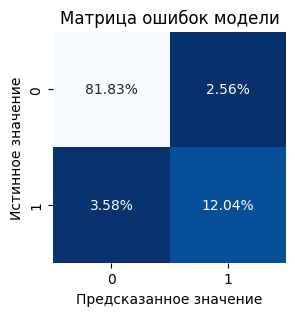

In [70]:
# строим матрицу ошибок модели
plot_confusion_matrix(y_test, y_pred, normalize='all');

По матрице ошибок сразу же видно, что *Recall* < *Precision*.

Рассчитаем метрики качества бинарной классификации:

- *Accuracy* — доля правильных предсказаний модели. 
- *Precision* — доля верно классифицированных объектов класса 1 от всех объектов, которые модель отнесла к классу 1.
- *Recall* — доля верно классифицированных объектов класса 1 от всех объектов, принадлежащих к классу 1.
- *Specificity* — доля верно классифицированных объектов класса 0. 
- *F1* — среднее гармоническое *Precision* и *Recall*.

In [71]:
# считаем метрики
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
specificity = recall_score(y_test, y_pred, pos_label=0)
f1 = f1_score(y_test, y_pred)

# объединяем значения в DataFrame
scores = pd.DataFrame(
    {'значение': [accuracy, precision, recall, specificity, f1]}, 
    index=['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1']
)
scores.round(3)

значение
Accuracy        0.939
Precision       0.825
Recall          0.771
Specificity     0.970
F1              0.797

Анализ метрик качества классификации показывает:
- В целом модель даёт верные предсказания в ≈94% случаев (метрика *Accuracy*). Но в ситуации дисбаланса классов этот показатель неадекватно отражает качество модели. 
- Среди абонентов, которых модель классифицировала как ушедших, таковыми на самом деле оказались ≈82.5% (метрика *Precision*). Это означает, что в ≈17.5% случаев абонент, отмеченный моделью как уходящий, на самом деле остался.
- Модель смогла верно выявить ≈77% ушедших абонентов (метрика *Recall*). Соответственно, в ≈23% случаев модель не смогла предсказать уход абонента.
- Модель верно классифицировала ≈97% оставшихся абонентов. Соответственно, лишь в ≈3% случаев модель неверно классифицировала оставшегося абонента как ушедшего.

Таким образом, модель хорошо выявляет отток клиентов, а также не слишком часто делает ложные предсказания оттока. При необходимости соотношение *Precision*/*Recall* можно изменить подбором порога классификации.

Построим график ROC-кривой для модели. Для сравнения на том же графике построим ROC-кривую для дамми-модели, предсказывающей класс случайным образом,используя информацию о распределении классов в обучающей выборке, а также теоретическую ROC-кривую для случайного предсказания.

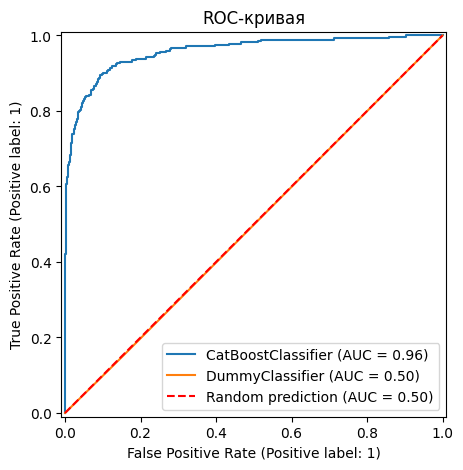

In [72]:
# ROC-кривая для лучшей модели
roc_display = RocCurveDisplay.from_estimator(best_model, X_test_encoded, y_test)

# ROC-кривая для дамми-модели
RocCurveDisplay.from_estimator(dummy_model, X_test_encoded, y_test, ax=roc_display.ax_)

# ROC-кривая для случайного предсказания
plt.plot([0, 1], [0, 1], 'r--', label='Random prediction (AUC = 0.50)')
plt.legend()
plt.title('ROC-кривая');

ROC-кривая показывает влияние порога классификации на работу модели. Для выбранной лучшей модели классификации ROC-кривая имеет хорошую форму, приближаясь к точке (FPR=0, TPR=1), а кривые для дамми-модели и случайного предсказания совпадают. 

Построим также PR-кривую для модели (зависимость *Precision* от *Recall*) и отметим на ней точку, соответствующую порогу классификации по умолчанию (0.5).

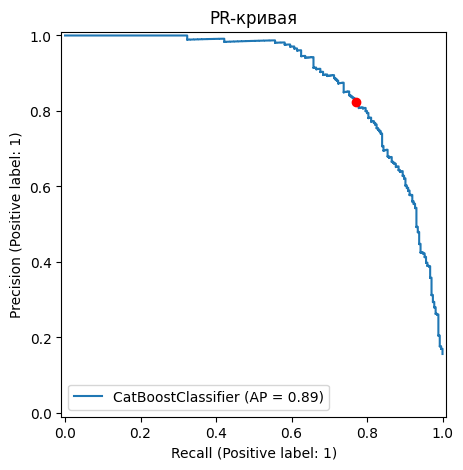

In [73]:
# PR-кривая для лучшей модели
PrecisionRecallDisplay.from_estimator(best_model, X_test_encoded, y_test)

# значения метрик модели при пороге по умолчанию
plt.plot(
    scores.at['Recall', 'значение'], 
    scores.at['Precision', 'значение'], 
    'ro'
)
plt.title('PR-кривая');

Как видно из графика, порог классификации 0.5 близок к оптимальному, который обеспечивает наилучший баланс между точностью и полнотой классификации.

### Анализ значимости признаков

У модели CatBoost, также как и у дерева решений, есть встроенное средство оценки значимости признаков — атрибут `feature_importances_`. Значимость признака показывает, насколько в среднем изменится прогноз при изменении значения признака. Чем больше значение важности, тем больше в среднем изменится значение прогноза при изменении этого признака.

Построим график значимости признаков для модели с помощью пользовательской функции `plot_feature_importance`.

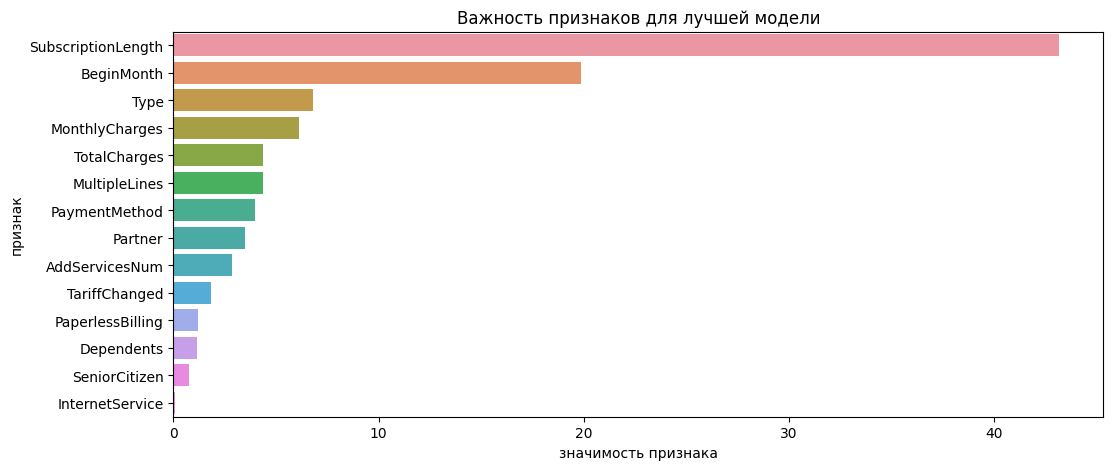

In [74]:
# строим график важности признаков для модели
plot_feature_importance(best_model.feature_importances_, best_model.feature_names_)
plt.xlabel('значимость признака')
plt.title('Важность признаков для лучшей модели');

Наиболее значимый при обучении модели признак — длительность подписки. Месяц начала действия договора тоже является значимым признаком. Далее по убыванию значимости идут тип оплаты, ежемесячные расходы. Вопреки ожиданиям, тип подключения оказался незначимым. Возможно, это обусловлено его сильной корреляцией с ежемесячными расходами.

Посмотрим, под влиянием каких признаков модель делает предсказания на тестовой выборке. Для этого воспользуемся средствами библиотеки **SHAP**. 

Для объяснения предсказаний модели CatBoost подойдёт класс `shap.TreeExplainer`.

In [75]:
# инициализируем объект explainer
shap_explainer = shap.TreeExplainer(best_model, feature_perturbation='tree_path_dependent')

# вычисляем значения Шепли для тестовой выборки
shap_values = shap_explainer(X_test_encoded)

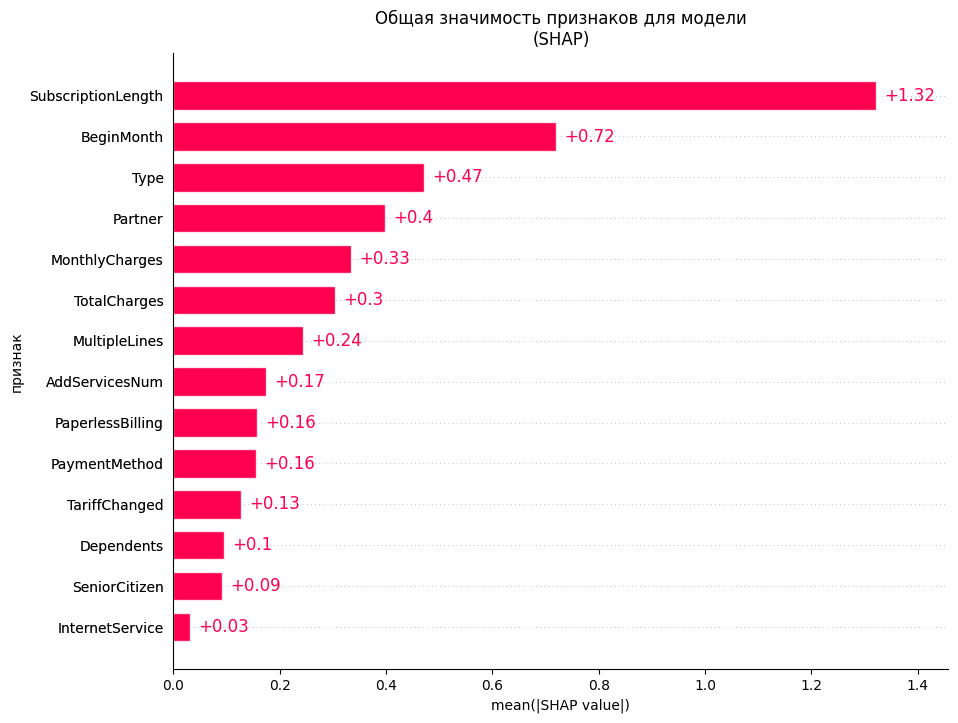

In [76]:
# строим график общей значимости признаков
ax = shap.plots.bar(shap_values, max_display=X_test.shape[1], show=False) 

# оформляем график
ax.figure.set_size_inches(10, 8)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.xaxis.label.set_size(10)  
ax.set_ylabel('признак')
ax.set_title('Общая значимость признаков для модели\n(SHAP)');

Топ-3 наиболее значимых признаков не поменялся. По-прежнему с большим отрывам лидирует длительность подписки. Но относительная значимость прочих признаков больше. Также на 4-м месте оказался признак наличия у абонента супруга или супруги.

SHAP позволяет оценить направленность влияния прогнозирующих признаков на целевой. Именно для этого значения категориальных признаков были закодированы в виде чисел перед обучением модели.

Для интерпретации цветовой шкалы значений признаков на графике `shap.plots.beeswarm` выведем "легенду" — соответствие исходных строковых значений категориальных признаков и их числовых кодов, которые получим из объекта кодировщика.

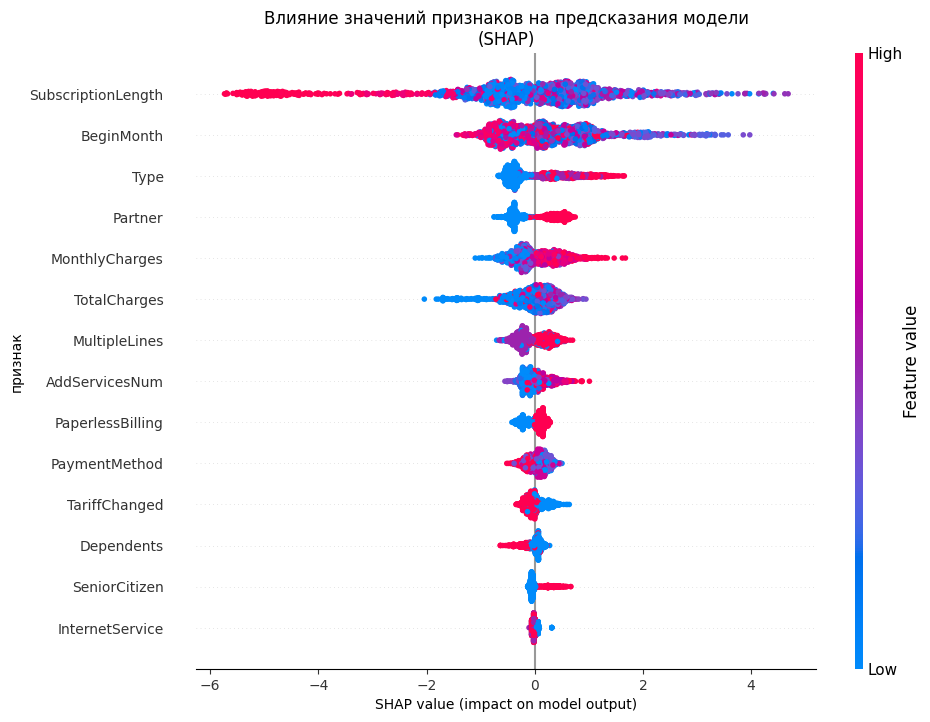

feature            Type PaperlessBilling              PaymentMethod  \
value                                                                 
0        Month-to-month               No  Bank transfer (automatic)   
1              One year              Yes    Credit card (automatic)   
2              Two year                -           Electronic check   
3                     -                -               Mailed check   

feature SeniorCitizen Partner Dependents InternetService MultipleLines  \
value                                                                    
0                  No      No         No           =N/A=         =N/A=   
1                 Yes     Yes        Yes             DSL            No   
2                   -       -          -     Fiber optic           Yes   
3                   -       -          -               -             -   

feature BeginMonth TariffChanged  
value                             
0                1            No  
1                2           Yes  
2                3             -  
3                4             -

In [77]:
# строим график, который показывает влияние значений признаков 
# на предсказания целевого признака
ax = shap.plots.beeswarm(shap_values, max_display=X_test.shape[1], show=False)

# оформляем график
ax.figure.set_size_inches(10, 8)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.xaxis.label.set_size(10) 
ax.set_ylabel('признак')
ax.set_title('Влияние значений признаков на предсказания модели\n(SHAP)')
plt.show()

# таблица с соответствиями значений категориальных признаков и их числовыми кодами
legend = (pd.DataFrame
    .from_dict(categories_dict, orient='index')
    .fillna('-')
    .T
    .rename_axis('value', axis=0)
    .rename_axis('feature', axis=1)
)

# выводим первые 4 строки таблицы, т.к. далее идут только коды месяцев, которые 
# на 1 меньше номера месяца
legend.head(4)

Для количественных признаков и категориальных признаков с более чем двумя значениями проанализируем зависимость значения Шепли от значения признака с помощью графиков `shap.plots.scatter`. При этом цветовая шкала на графиках покажет значения ещё одного признака с наиболее сильным взаимодействием с исследуемым признаком.

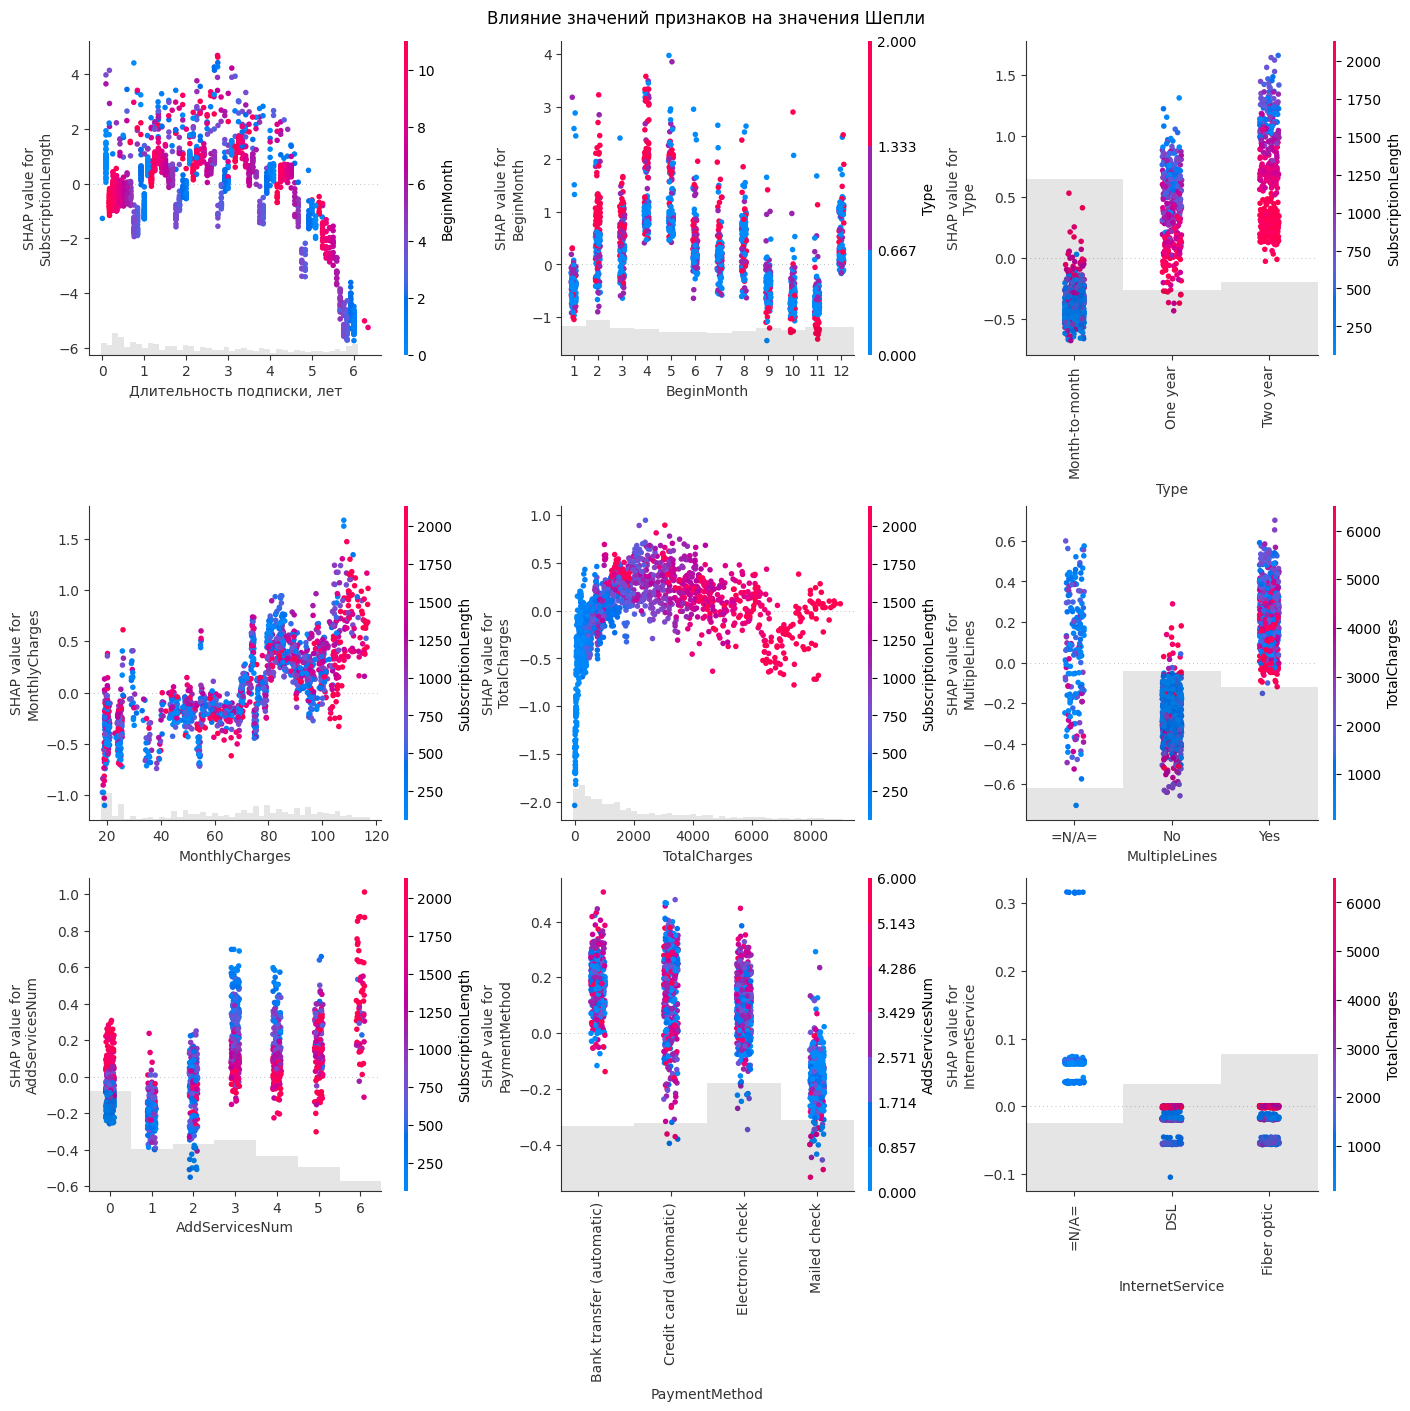

In [78]:
# список признаков для построения графиков
features_to_plot = [
    'SubscriptionLength',
    'BeginMonth',
    'Type',
    'MonthlyCharges',
    'TotalCharges',
    'MultipleLines',
    'AddServicesNum',
    'PaymentMethod',
    'InternetService',
]

# создаём область построения графиков
fig, axes = plt.subplots(3, 3, figsize=(14, 14), constrained_layout=True)

# строим графики
for ax, feature in zip(axes.ravel(), features_to_plot):
    shap.plots.scatter(shap_values[:, feature], color=shap_values, ax=ax, show=False)

# уменьшаем размер шрифта на графиках
for ax in fig.get_axes():
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.xaxis.label.set_size(10) 
    ax.yaxis.label.set_size(10)

# настраиваем оси на графиках
axes[0, 0].set_xticks(range(0, data['SubscriptionLength'].max() + 1, 365), range(0, 7));
axes[0, 0].set_xlabel('Длительность подписки, лет');
axes[0, 1].set_xticks(range(len(categories_dict['BeginMonth'])), categories_dict['BeginMonth']);
axes[0, 2].set_xticks(range(len(categories_dict['Type'])), categories_dict['Type'], rotation=90);
axes[1, 2].set_xticks(range(len(categories_dict['MultipleLines'])), categories_dict['MultipleLines']);
axes[2, 0].set_xticks(range(0, data['AddServicesNum'].max() + 1));
axes[2, 1].set_xticks(range(len(categories_dict['PaymentMethod'])), categories_dict['PaymentMethod'], rotation=90);
axes[2, 2].set_xticks(range(len(categories_dict['InternetService'])), categories_dict['InternetService'], rotation=90);   

fig.suptitle('Влияние значений признаков на значения Шепли');

Анализ влияния значений признаков на предсказания модели показывает:

- Абоненты со стажем более 4 лет значительно менее склонны к оттоку. Наверное, это связано с тем, что их всё устраивает, и не они видят смысла менять оператора. При меньшем стаже зависимость обратная: склонность к оттоку возрастает с увеличением стажа и достигает максимума при стаже около 3 лет. На графике также заметен эффект сезонности по месяцам.

- К оттоку наиболее склонны абоненты, подключившиеся в апреле, мае и декабре. А наименее склонны подключившиеся осенью (с сентября по ноябрь) и в январе. Вероятно, это связано с сезонностью в жизни людей. Например,  начало учебного семестра в университетах как раз приходится на сентябрь и январь. Также возможно, что сезонность связана с проведением маркетинговых акций со скидками в эти месяцы, и отток происходит среди тех, кто подключился со скидкой, а потом нашёл более выгодное предложение у другого оператора.

- К оттоку более склонны абоненты, заключившие договор на более длительный срок. Причём среди них больше склонны к оттоку абоненты с меньшим стажем. Так, среди заключивших договор сразу на 2 года склонность к оттоку выше у абонентов со стажем менее 2 лет. Получается, что они досрочно разрывают договор с оператором. Возможно, их не устраивает качество оказываемых услуг. 

- К оттоку более склонны абоненты, имеющие супруга или супругу. Как можно убедиться по приведённому ниже графику зависимости среднего значения количества подключённых дополнительных услуг от семейного положения, семейные абоненты больше пользуются дополнительными интернет-услугами. Значит, есть вопросы к качеству дополнительных услуг.

- К оттоку более склонны абоненты с высокими ежемесячными расходами. 

- Недавно подключившиеся абоненты, у которых общие расходы малы, намного менее склонны к оттоку. Но и у давних клиентов с высокими общими расходами склонность к оттоку невысока.

- К оттоку более склонны абоненты, использующие больше дополнительных интернет-услуг и подключение телефона к нескольким линиям одновременно. Причём среди тех, кто пользуется 3-4 дополнительными услугами, больше склонны к оттоку абоненты с меньшим стажем (для абонентов с более чем 4 услугами мало данных). Это тоже может быть обусловлено проблемами с качеством услуг. 

- Консервативные абоненты, предпочитающие оплачивать услуги по бумажной квитанции (`Mailed check`), менее склонны к оттоку.

- Также к оттоку более склонны абоненты (в порядке убывания значимости признака):
    - выбравшие электронный расчётный лист,
    - не менявшие тариф,
    - пенсионеры.

- Значимость типа подключения для прогнозирования оттока оказалась незначительной.

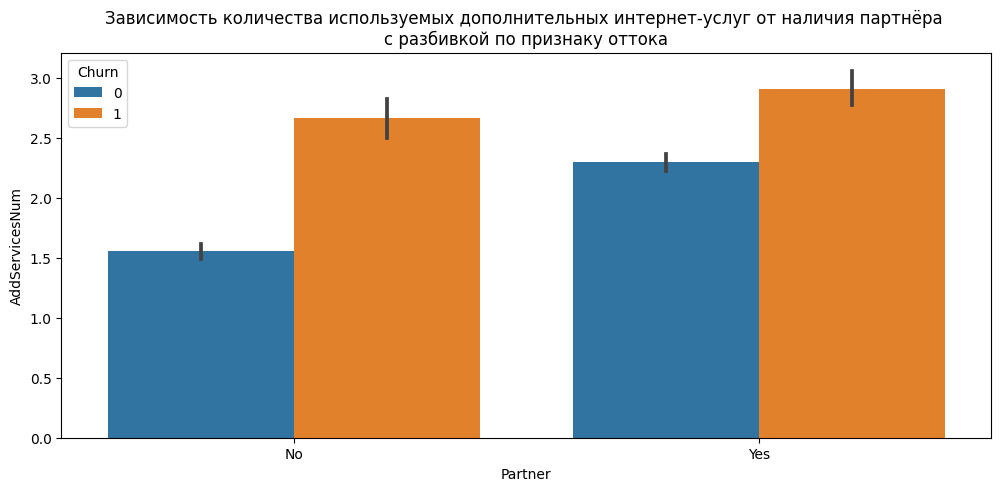

In [79]:
# строим график зависимости среднего значения 'AddServicesNum' от 'Partner'
sns.barplot(data=data, x='Partner', y='AddServicesNum', hue='Churn', order=sorted(data['Partner'].unique()))
plt.title('Зависимость количества используемых дополнительных интернет-услуг от наличия партнёра \nс разбивкой по признаку оттока');

In [80]:
# засекаем время окончания выполнения кода
end_time = time.time()
# вычисляем суммарное время выполнения кода в секундах
total_execution_time = int(end_time - start_time)
# выводим суммарное время выполнения кода в формате часы:минуты:секунды
print(f"Суммарное время выполнения кода: {timedelta(seconds=total_execution_time)} s")

Суммарное время выполнения кода: 0:02:31 s


### Выводы

1. Выбранная ML модель адекватно предсказывает отток абонентов. Качество предсказаний модели на тестовой выборке существенно лучше, чем у дамми-модели, которая делает предсказания случайным образом, используя информацию о распределении классов в обучающей выборке.

2. Анализ ошибок ML модели на тестовой выборке показал, что при значении порога классификации по умолчанию (0.5) модель смогла верно выявить ≈77% ушедших абонентов, при этом среди абонентов, которых модель классифицировала в отток, на самом деле ушедшими оказались ≈82.5%. Таким образом, модель хорошо выявляет отток клиентов, а также не слишком часто делает ложные предсказания оттока. Анализ PR-кривой показал, что порог классификации 0.5 близок к оптимальному, который обеспечивает наилучший баланс между точностью и полнотой классификации.

3. Анализ значимости признаков для модели показал, что наиболее значимые для модели признаки (в порядке убывания значимости): длительность подписки (абонентский стаж), месяц начала действия договора, тип оплаты.

4. На основании исследования влияния значений признаков на предсказания модели можно составить **портрет типичного уходящего клиента**. Это семейный абонент со стажем 2-3 года, начавший пользоваться услугами оператора в апреле-мае, выбравший тип оплаты раз в 2 года и не менявший за всё время тариф, активно пользующийся дополнительными услугами и имеющий высокие ежемесячные расходы. 
    
5. Анализ влияющих факторов позволяет предположить, что основная **причина уходя клиентов** заключается в их неудовлетворённости качеством либо стоимостью дополнительных услуг, оказываемых оператором связи. Влияние сезонности по месяцу подключения на отток может означать, что к оттоку также склонны абоненты, подключившиеся в рамках сезонных маркетинговых акций по привлечению новых абонентов.

## Общий вывод

### Отчёт по проекту

В проекте была поставлена задача разработать модель для прогноза оттока клиентов, которая будет предсказывать, разорвёт ли абонент договор, на основе персональных данных о клиенте и информации об их тарифах и используемых услугах. Модель должна помочь оператору связи установить причины оттока абонентов и разработать меры для их удержания. Таким образом, помимо предсказания целевого признака ещё одна цель применения ML модели — получение информации о значимости влияющих факторов.

**Краткое описание выполненной работы**:

1. **Исходные данные** содержатся в 4 таблицах (CSV файлах). Объём данных относительно небольшой: в таблицах содержатся данные о примерно 7 тысяч абонентов.

2. Выполнен исследовательский анализ и проведена первичная **предобработка исходных данных**:
    - Выполнено преобразование типов данных, при этом некорректные значения преобразованы в пропуски:
        - Даты приведены к типу даты-времени;
        - Данные об общих расходах абонентов приведены в числовому типу.       
    
    - Проверено отсутствие дубликатов. 

    - Значения идентификатора абонента установлены в качестве индекса во всех таблицах.
    
3. Исходные **таблицы объединены** в одну по ключу — идентификатору абонента. В объединённую таблицу включены данные обо всех абонентах, для которых есть информация о договоре. Из-за этого в некоторых полях таблицы появились пропуски, которые означают, что клиент соответствующими услугами не пользуется.

4. Проведена необходимая **предобработка объединённых данных** — обработаны пропущенные значения:
     - Пропущенные значения общих расходов у новых абонентов, которые заключили договор в дату выгрузки данных, заполнены значением `0`. 
    - Пропущенные значения в категориальных признаках заполнены плейсхолдером `=N/A=` (N/A — not applicable).

5. **Сгенерированы признаки**, которые будут использованы для обучения ML моделей:
    - Целевой признак — отток, т.е. прекратил ли абонент действие договора;
    - Дополнительные прогнозирующие признаки: 
        - длительность подписки в днях — срок от даты начала до даты окончания действия договора, либо до текущей даты, если договор продолжает действовать, 
        - месяц начала действия договора, 
        - количество подключённых дополнительных интернет-услуг, 
        - факт смены тарифа.

6. Проведён **исследовательский анализ** распределений признаков и корреляций между ними с целью отбора полезных прогнозирующих признаков для обучения ML моделей.
    - Выявлены различия в распределениях по значениям признаков между ушедшими и остающимися абонентами.
    - Анализ корреляций выявил наличие сильной корреляции (мультиколлинеарность) между некоторыми входными признаками.
    - Корреляции прогнозирующих признаков с целевым невелики (<0.4).
    - В данных обнаружен умеренный дисбаланс классов по целевому признаку: доля ушедших составляет 15.6 % среди всех абонентов, представленных в данных.
    - На основании результатов исследовательского анализа данных составлен предварительный портрет типичного ушедшего абонента, который будет впоследствии уточнён по результатам анализ значимости признаков для построенной ML модели, прогнозирующей отток клиентов.


7. **Данные подготовлены** для обучения моделей:
    - На основании результатов исследовательского анализа данных принято решение использовать в качестве прогнозирующих признаков (предикторов) все признаки из исходных данных, за исключением пола абонента, фактов использования отдельных дополнительных интернет-услуг и дат начала и окончания действия договора, а также все сгенерированные новые признаки:
        - месяц начала действия договора, который рассматривается как категориальный, чтобы правильно учесть его цикличность; 
        - факт смены тарифа;
        - длительность подписки в днях; 
        - количество дополнительных интернет-услуг, используемых абонентом.
    
    - Прогнозирующие признаки и целевой признак (отток) выделены в отдельные переменные. 
    
    - Подготовленные данные разделены на обучающую и тестовую выборки в пропорции 3:1 стратифицированным образом по целевому признаку.

8. **Обучены ML модели** 2 типов: логистическая регрессия в пайплайне с трансформером для подготовки данных путём OHE-кодирования категориальных признаков и стандартизации количественных и модель градиентного бустинга на деревьях решений из библиотеки CatBoost.

    - При построении моделей использовано взвешивание классов для учёта их дисбаланса в данных.

    - Подобраны оптимальные значения некоторых гиперпараметров моделей, обеспечивающие максимальное среднее значение метрики ROC-AUC при кросс-валидации на обучающей выборке:
        - для логистической регрессии: тип регуляризации (L1 или L2) и параметр силы регуляризации;
        - для CatBoost: скорость обучения, глубина отдельного дерева в ансамбле, тип взвешивания классов.
     
9. Из числа обученных моделей по критерию максимального значения метрики ROC-AUC при кросс-валидации на обучающей выборке выбрана **лучшая модель** — модель CatBoost `CatBoostClassifier`.
    - Гиперпараметры модели: `iterations=100`, `learning_rate=0.82`, `depth=6`, `auto_class_weights='SqrtBalanced'`, `random_state=50525`.
    - Модель обучена на данных с 14 признаками:
        - `MonthlyCharges` — расходы абонента за месяц;
        - `TotalCharges` — общие расходы абонента;
        - `SubscriptionLength` — длительность подписки в днях (срок от даты начала до даты окончания действия договора, либо до текущей даты, если договор продолжает действовать);
        - `AddServicesNum` — количество подключённых дополнительных интернет-услуг;
        - `Type` — тип оплаты: раз в год-два или ежемесячно;
        - `PaperlessBilling` — электронный расчётный лист;
        - `PaymentMethod` — тип платежа;
        - `SeniorCitizen` — является ли абонент пенсионером;
        - `Partner` — есть ли у абонента супруг или супруга;
        - `Dependents` — есть ли у абонента дети;
        - `InternetService` — тип подключения;
        - `MultipleLines` — факт подключения телефона к нескольким линиям одновременно;
        - `BeginMonth` — месяц начала действия договора;
        - `TariffChanged` — факт смены тарифа.

    - Значение метрики ROC-AUC выбранной лучшей модели на тестовой выборке составило **0.9584**, что удовлетворяет заданному требованию ROC-AUC ≥ 0.85. Таким образом, построенная **модель удовлетворяет требованиям заказчика**. Качество модели не тестовой выборке оказалось даже выше, чем при кросс-валидации на обучающей выборке. Значит, модель не переобучилась и качество её предсказаний стабильно.

    - Значение метрики *Accuracy* выбранной лучшей модели на тестовой выборке составило 0.9387. Это означает, что модель правильно предсказывает отток для ≈94% абонентов.
     
    - Модель адекватно предсказывает отток абонентов — качество её предсказаний существенно лучше, чем у дамми-модели, которая делает предсказания случайным образом, используя информацию о распределении классов в обучающей выборке.

    - Анализ ошибок модели на тестовой выборке показал, что при значении порога классификации по умолчанию (0.5) модель смогла верно выявить ≈77% ушедших абонентов, при этом среди абонентов, которых модель классифицировала в отток, на самом деле ушедшими оказались ≈82.5%. Таким образом, модель хорошо выявляет отток клиентов, а также не слишком часто делает ложные предсказания оттока. 
    
    - Анализ PR-кривой модели (зависимости *Precision* от *Recall*) показал, что порог классификации по умолчанию (0.5) близок к оптимальному, который обеспечивает наилучший баланс между точностью и полнотой классификации.
    
    - Наиболее значимые для модели признаки (в порядке убывания значимости) — длительность подписки (абонентский стаж), месяц начала действия договора, тип оплаты:
        - Абоненты со стажем более 4 лет значительно менее склонны к оттоку. Наверное, это связано с тем, что их всё устраивает, и не они видят смысла менять оператора. При меньшем стаже склонность к оттоку возрастает с увеличением стажа и достигает максимума при стаже около 3 лет. 
        - К оттоку наиболее склонны абоненты, подключившиеся в апреле, мае и декабре. А наименее склонны подключившиеся осенью (с сентября по ноябрь) и в январе. Вероятно, это связано с сезонностью в жизни людей. Например,  начало учебного семестра в университетах как раз приходится на сентябрь и январь. Также возможно, что сезонность связана с проведением маркетинговых акций со скидками в эти месяцы, и отток происходит среди тех, кто подключился со скидкой, а потом нашёл более выгодное предложение у другого оператора.
        - К оттоку более склонны абоненты, заключившие договор на более длительный срок. Причём среди них больше склонны к оттоку абоненты с меньшим стажем. Так, среди заключивших договор сразу на 2 года склонность к оттоку выше у абонентов со стажем менее 2 лет. Получается, что они досрочно разрывают договор с оператором. Возможно, их не устраивает качество оказываемых услуг. 


**Главные проблемы и ключевые решения, применённые в работе над проектом:**

- *Проблема*: Пропущенные значения в данных, которые имелись в исходных данных (неявные пропуски — плейсхолдеры), а также возникли при объединении данных вследствие того, что абоненты некоторыми услугами не пользуются. 

  *Решение*: заполнение пропущенных значений на основе анализа причин их возникновения, при этом не используя для заполнения уже имеющиеся значения категориальных признаков.

- *Проблема*: Выбор релевантных признаков для обучения моделей. 

  *Решение*: Создание новых прогнозирующих признаков исходя из априорных представлений о факторах, которые могут влиять на отток клиентов, в сочетании с последующей проверкой степени их связи с целевым признаком (фактом оттока) путём анализа распределений с разбивкой по значению целевого признака и анализа корреляций. Использование для обучения моделей максимального количества прогнозирующих признаков, за исключением непригодных (даты начала и окончания действия договора), нерелевантных (пол абонента), и сильно коррелированных между собой (факты использования отдельных дополнительных интернет-услуг) чтобы повысить качество предсказаний модели. 

- *Проблема*: Выбор типа ML модели для предсказания оттока клиентов.

  *Решение*: Предсказание оттока — это задача бинарной классификации. В качестве базовой модели классификации выбрана логистическая регрессия. Также рассмотрена более продвинутая модель градиентного бустинга на деревьях решений CatBoost.

- *Проблема*: Подготовка данных для обучения моделей в зависимости от их типа. 

  *Решение*: Для логистической регрессии требуется OHE-кодирование категориальных признаков и масштабирование количественных. При этом подготовка данных включена в пайплайн модели, чтобы избежать утечки целевого признака при кросс-валидации. Для модели CatBoost дополнительная подготовка данных не требуется, тем не менее применено порядковое кодирование значений категориальных признаков для удобства последующего анализа влияния значений признаков на предсказания модели.

- *Проблема*: Выбор наиболее эффективных средств автоматизированного подбора оптимальных значений гиперпараметров моделей. 

  *Решение*: При небольшом пространстве вариантов использован полный перебор, а в случае большого количества возможных комбинаций использован поиск методом байесовской оптимизации с помощью средств библиотеки Optuna.
  
- *Проблема*: Выбор лучшей ML модели.

  *Решение*: Лучшая модель выбрана по критерию максимального значения метрики ROC-AUC при кросс-валидации на обучающей выборке.
  
- *Проблема*: Оценка качества предсказаний ML модели для бизнеса. 

  *Решение*: Анализ ошибок модели на тестовой выборке и интерпретация значений метрик качества классификации, проверка оптимальности заданного порога классификации.

- *Проблема*: Встроенное в модель средство оценки значимости признаков (атрибут `feature_importances_`) не даёт информации о направленности влияния признаков на предсказания модели. 

  *Решение*: Анализ значимости признаков для модели (силы и направленности их влияния на предсказания модели) на основе значений Шепли с помощью средств библиотеки SHAP.


**Рекомендации для дальнейшего улучшения модели:**
- Модель для предсказания оттока абонентов оператора связи была построена в предположении стационарности процесса оттока, т.е. постоянстве оттока во времени. Но в реальности отток может иметь тренд. Для его учёта можно добавить в качестве прогнозирующего признака, например, долю оттока за предшествующий год. Учёт тренда важен при обучении модели на данных за длительный промежуток времени. 

- Разделить абонентов на сегменты по стажу, уровню расходов и используемым услугам, и для каждого сегмента разработать отдельную ML модель. Также можно попытаться применить методы кластеризации для автоматического выделения сегментов. В этом случае можно получить лучшее общее качество предсказаний, а также на основе анализа влияния признаков на предсказания модели построить портрет уходящего клиента отдельно для каждого сегмента, что позволит выработать дифференцированный подход к удержанию клиентов, склонных к оттоку.

### Выводы и рекомендации для бизнеса

1. Разработана ML модель для предсказания оттока абонентов оператора связи. Модель позволяет выявить 77% уходящих абонентов, а из абонентов, которых модель классифицирует как склонных к оттоку, таковыми на самом деле являются 82.5%. В целом модель правильно предсказывает отток для 94% абонентов, при этом довольно хорошо выявляет отток клиентов, а также не слишком часто делает ложные предсказания оттока. 

2.  На основании исследования влияния значений признаков на предсказания ML модели, предсказывающей уход клиентов, получен уточнённый **портрет типичного уходящего клиента**, который склонен к оттоку, сформулированы **вероятные причины оттока клиентов** и **рекомендации по удержанию уходящих клиентов**.

    - **Портрет уходящего клиента**: Семейный абонент со стажем 2-3 года, начавший пользоваться услугами оператора в апреле-мае, выбравший тип оплаты раз в 2 года и не менявший за всё время тариф, активно пользующийся дополнительными услугами и имеющий высокие ежемесячные расходы.
    
    - **Вероятные причины уходя клиентов**: Неудовлетворённость качеством либо стоимостью дополнительных услуг, оказываемых оператором связи. Влияние сезонности по месяцу подключения на отток может означать, что к оттоку также склонны абоненты, подключившиеся в рамках сезонных маркетинговых акций по привлечению новых абонентов.
    
    - **Рекомендации по удержанию уходящих клиентов**: 
        - Следует повышать удовлетворённость абонентов качеством дополнительных услуг, для этого нужно прежде всего выявить наличие проблем с качеством и доступностью услуг, а также провести оценку их конкурентоспособности в сравнении с другими операторами связи, предоставляющими аналогичные услуги. 
        - При планировании акций по привлечению новых абонентов следует особое внимание уделить повышению их долгосрочной лояльности. 